In [1]:
import numpy as np
import pandas as pd
from format_data import *
from preprocess import *
from plots import *
from utils import *

In [2]:
Db=create_dataframe()

c:\Users\linab\Desktop\3A\ApprAuto\apprAuto-projet\format_data.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Db[NUMERICAL_COL] = Db[NUMERICAL_COL].applymap(convert_less_than)


# Supervised: output yield_strength

## 1. Preprocessing

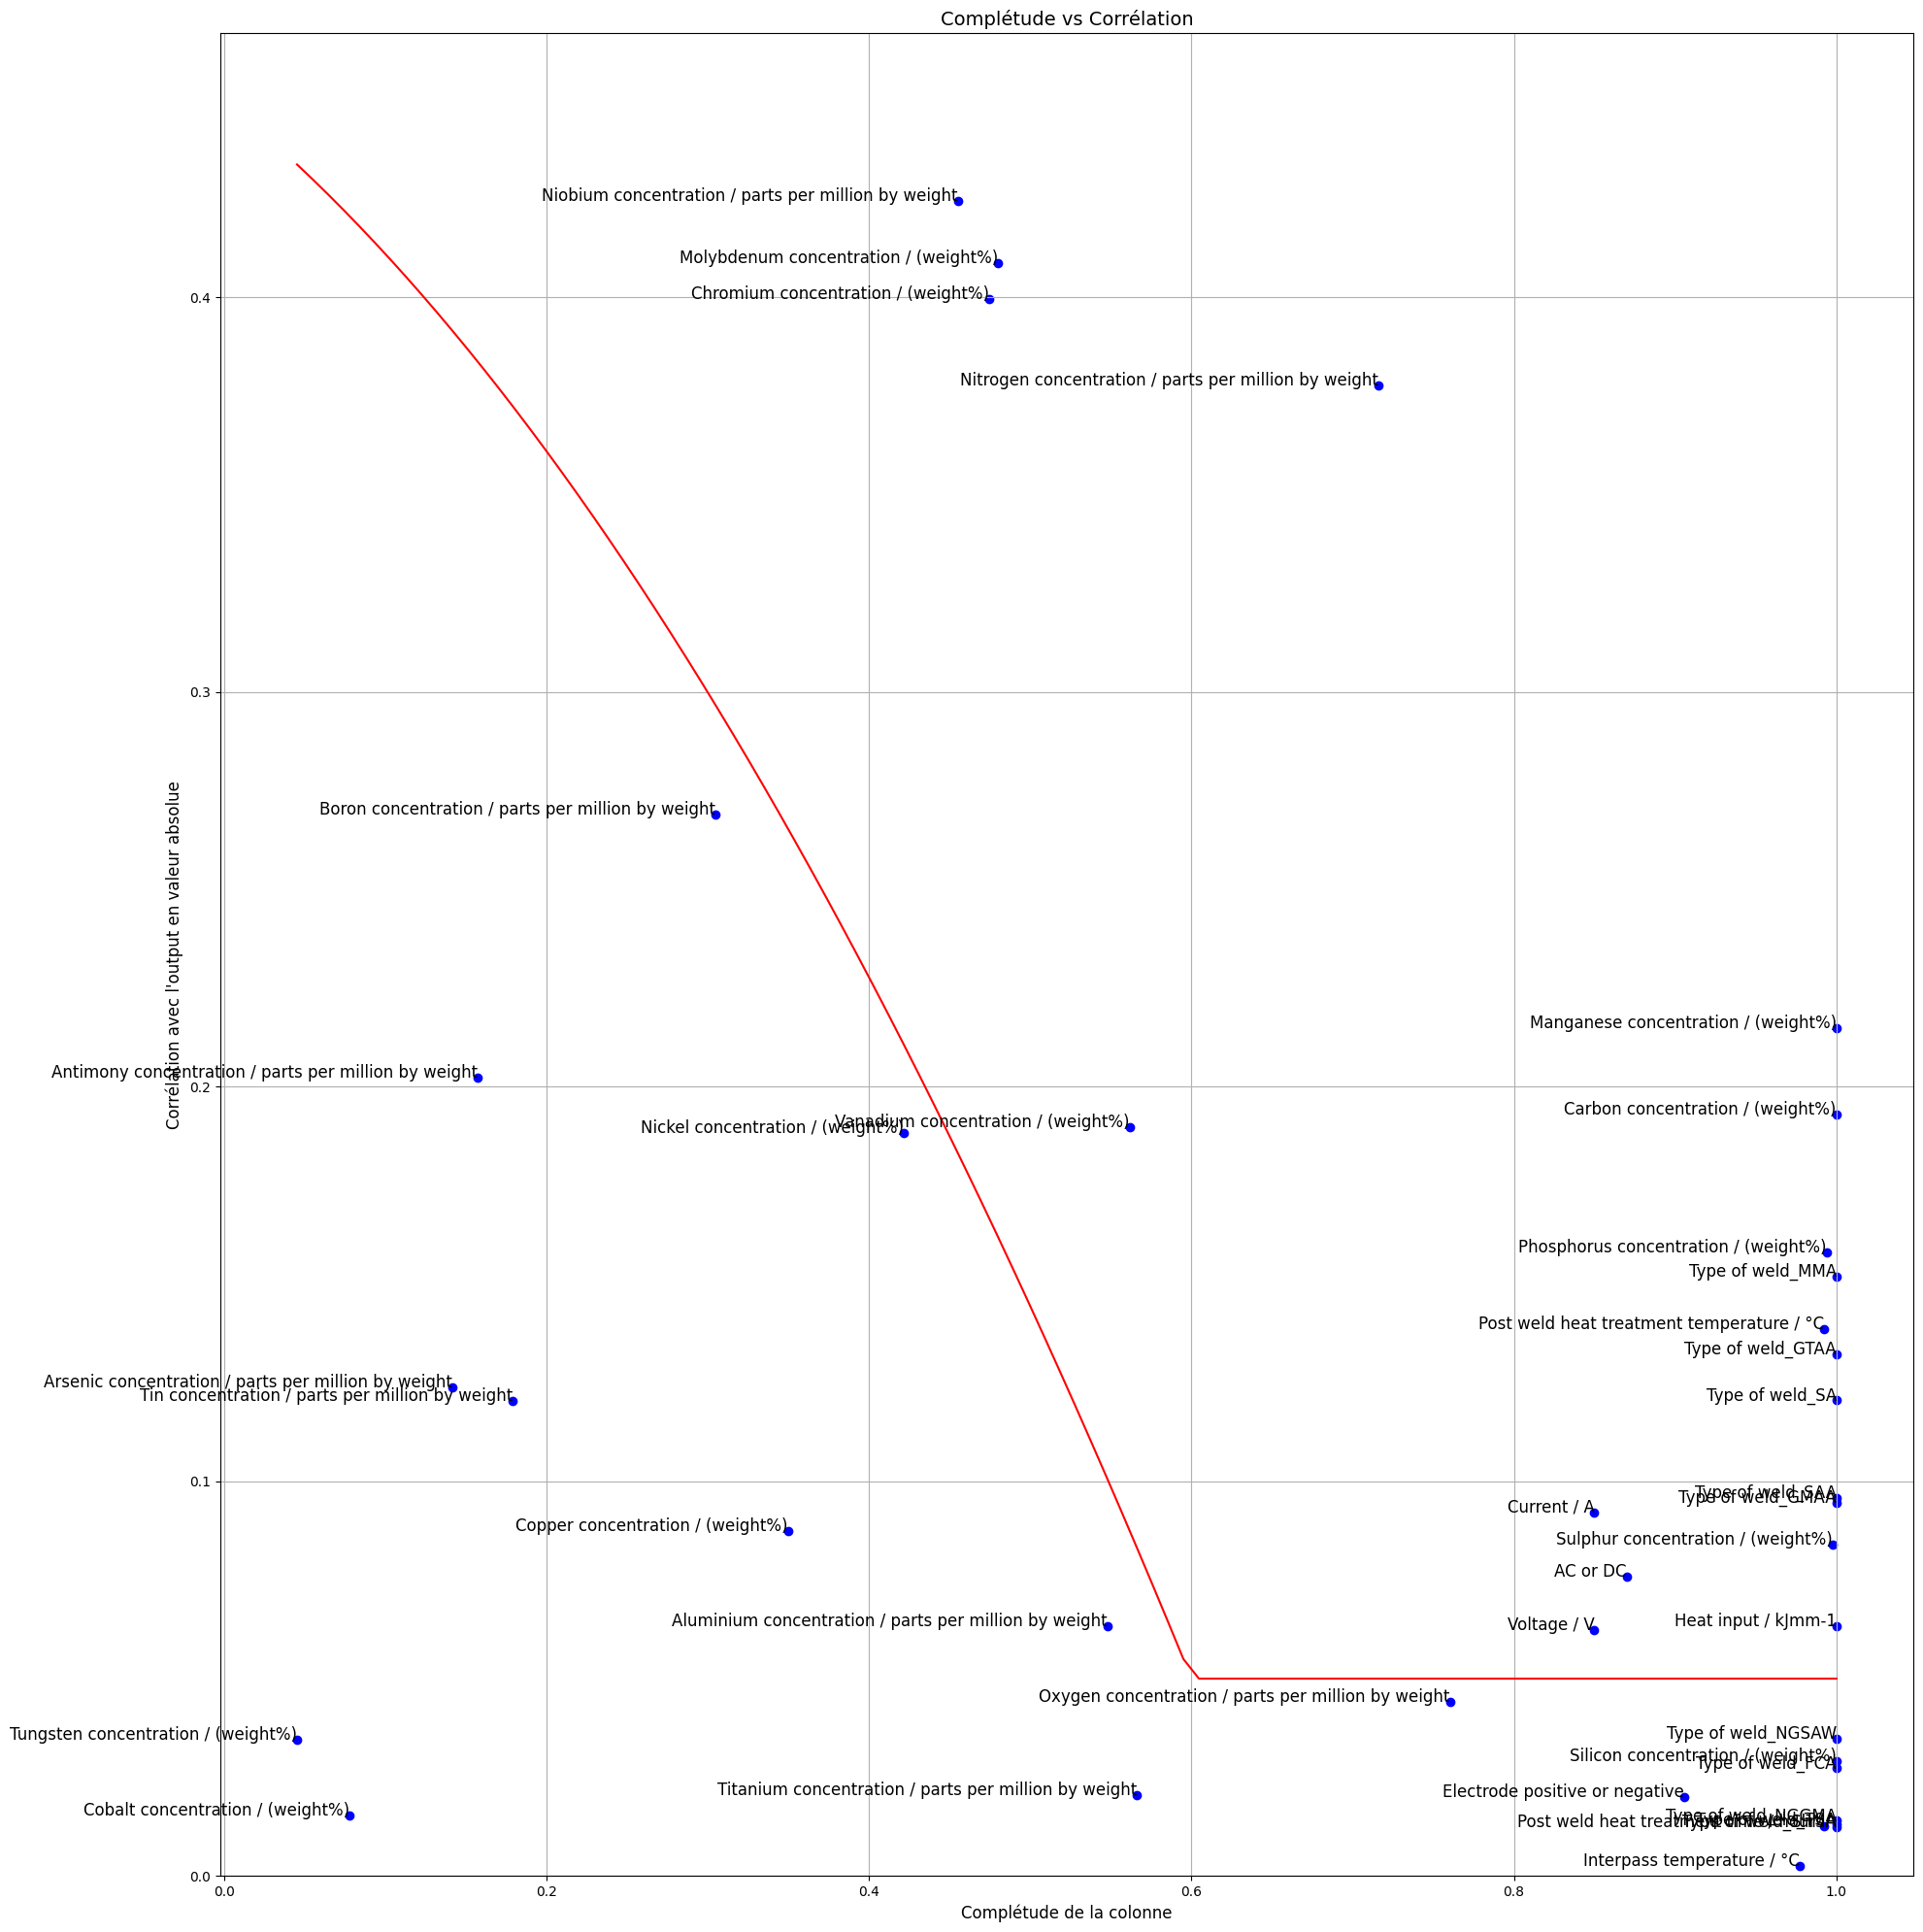

In [3]:
plot_completeness_vs_corr(Db, OutputColumn.yield_strength, feature_decision=feature_decision)

In [4]:
preprocessed_Db = preprocess_supervised(Db, output_col=OutputColumn.yield_strength, all_welds=False)
y=preprocessed_Db['output']
X=preprocessed_Db.drop('output', axis=1)

We retain only the rows with output values Yield strength / MPa, that is 47.215496% of the dataset


## 2. Regressions

## 3. Random Forest

## 4. Gradient Boosting

# PCA

In [6]:
from dataset_analysis.PCA import *
pca_datset=preprocess_PCA(Db)
pca_datset.describe()

Tin concentration / parts per million by weight  \
count                                      1652.000000   
mean                                         -0.256761   
std                                           1.103616   
min                                          -5.481478   
25%                                          -0.473444   
50%                                          -0.073884   
75%                                           0.273963   
max                                          10.793319   

       Copper concentration / (weight%)  \
count                       1652.000000   
mean                          -0.063861   
std                            1.179821   
min                           -9.969806   
25%                           -0.533170   
50%                           -0.222450   
75%                            0.449769   
max                            4.517853   

       Post weld heat treatment temperature / °C  \
count                                1652.000000   
mean                                   -0.002993   
std                                     0.998656   
min                                    -1.535411   
25%                                    -1.067493   
50%                                    -0.191563   
75%                                     0.964665   
max                                     1.595334   

       Carbon concentration / (weight%)  Tungsten concentration / (weight%)  \
count                      1.652000e+03                         1652.000000   
mean                       4.129062e-16                           -0.330928   
std                        1.000303e+00                            1.517608   
min                       -1.947250e+00                           -5.729302   
25%                       -5.764332e-01                           -1.144288   
50%                       -6.368496e-02                           -0.311552   
75%                        4.385990e-01                            0.493831   
max                        4.373157e+00                           12.581794   

       Chromium concentration / (weight%)  Vanadium concentration / (weight%)  \
count                         1652.000000                         1652.000000   
mean                            -0.196969                           -0.027627   
std                              0.860318                            0.996786   
min                             -2.227725                           -3.365339   
25%                             -0.694724                           -0.257858   
50%                             -0.396796                           -0.221223   
75%                              0.065703                            0.339532   
max                              2.928476                           16.362890   

       Manganese concentration / (weight%)  \
count                         1.652000e+03   
mean                         -5.161327e-17   
std                           1.000303e+00   
min                          -2.441805e+00   
25%                          -6.879747e-01   
50%                           1.758520e-01   
75%                           6.208536e-01   
max                           2.741155e+00   

       Titanium concentration / parts per million by weight  \
count                                        1652.000000      
mean                                           -0.120885      
std                                             1.133248      
min                                            -5.826850      
25%                                            -0.727819      
50%                                            -0.372294      
75%                                             0.383129      
max                                             6.292351      

       Antimony concentration / parts per million by weight  ...  \
count                                        1652.000000     ...   
mean                                           -0.020108     ...  

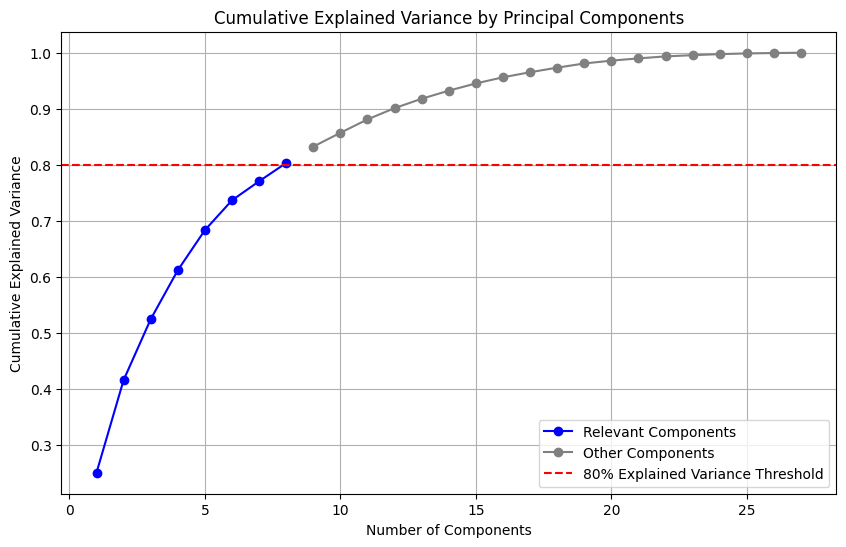

In [7]:
pca, principal_components, nb_relevant_features = run_PCA(pca_datset)
plot_explained_variance_pca(pca, nb_relevant_features)

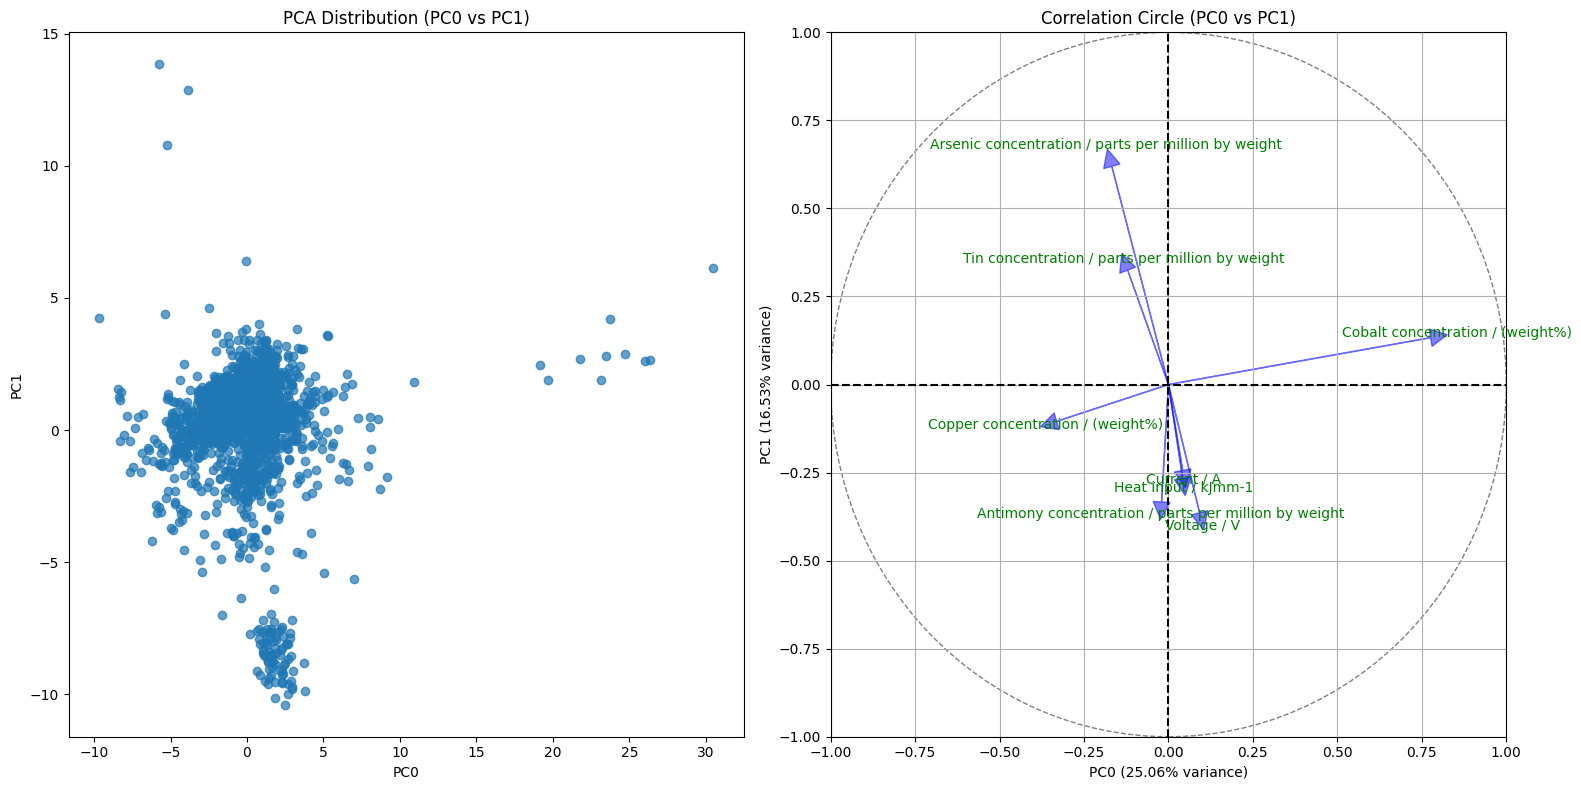

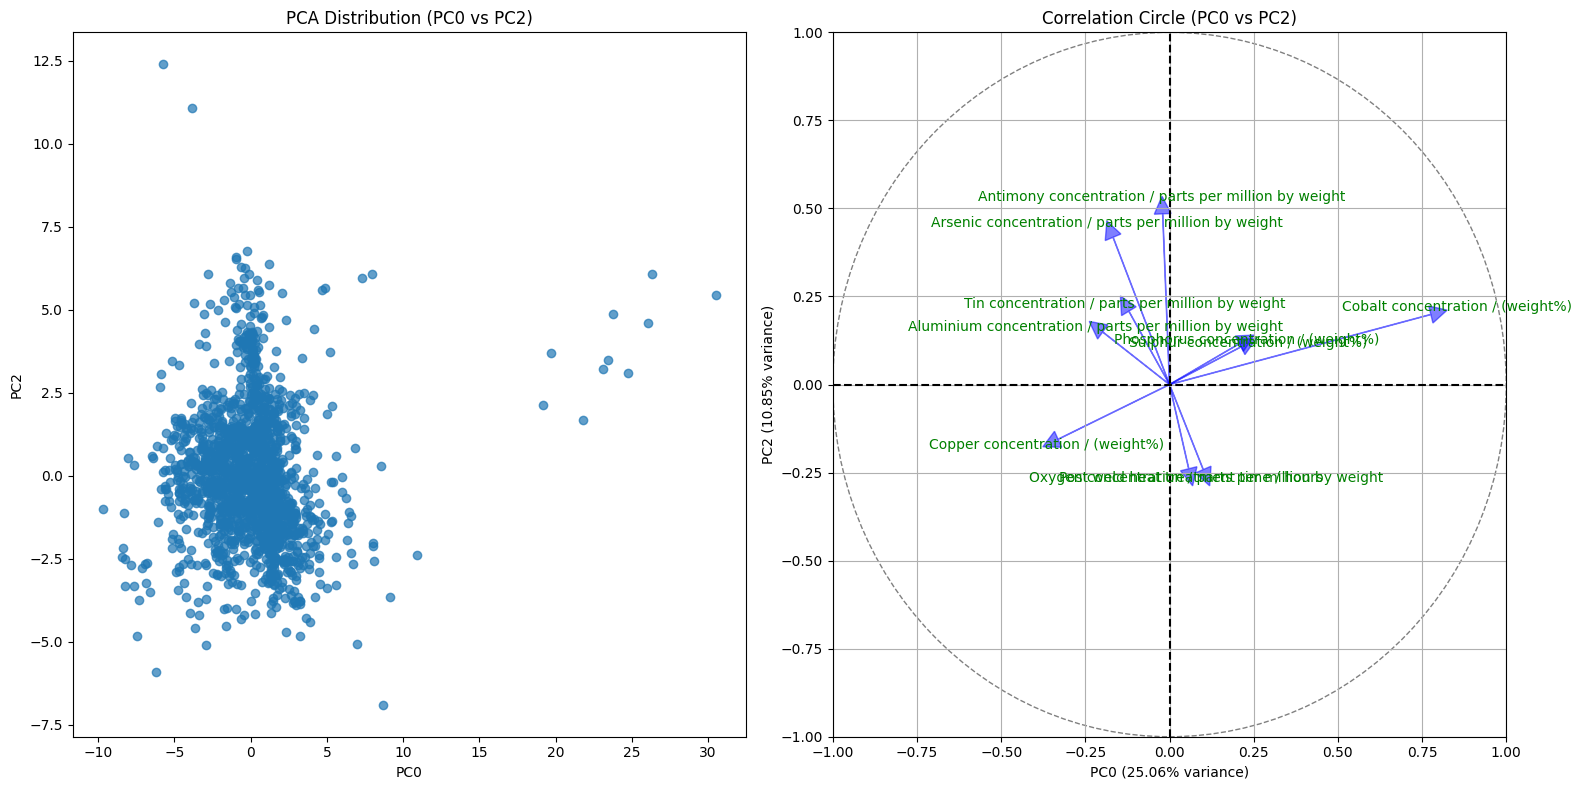

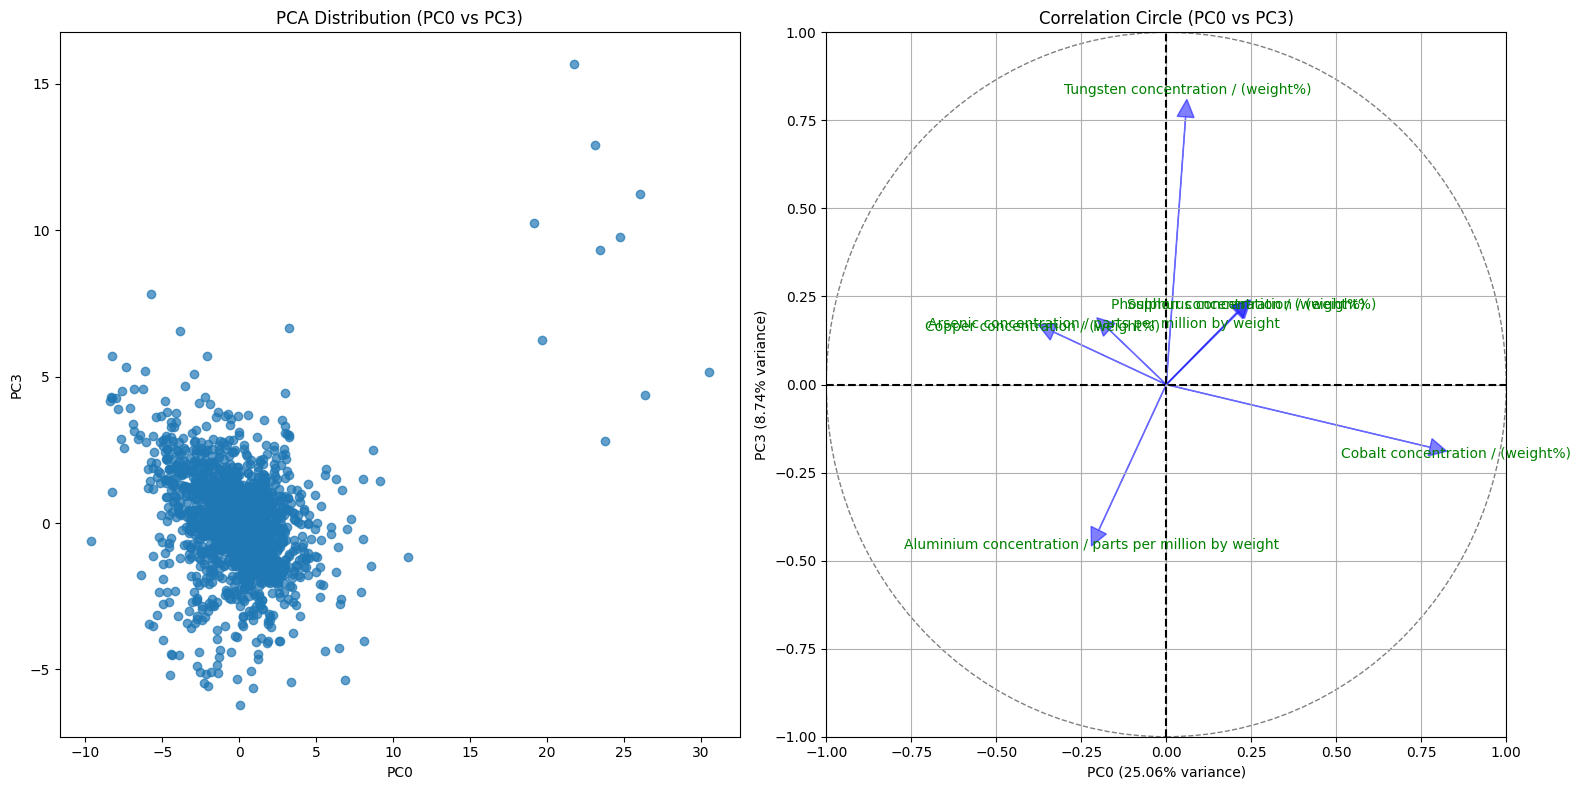

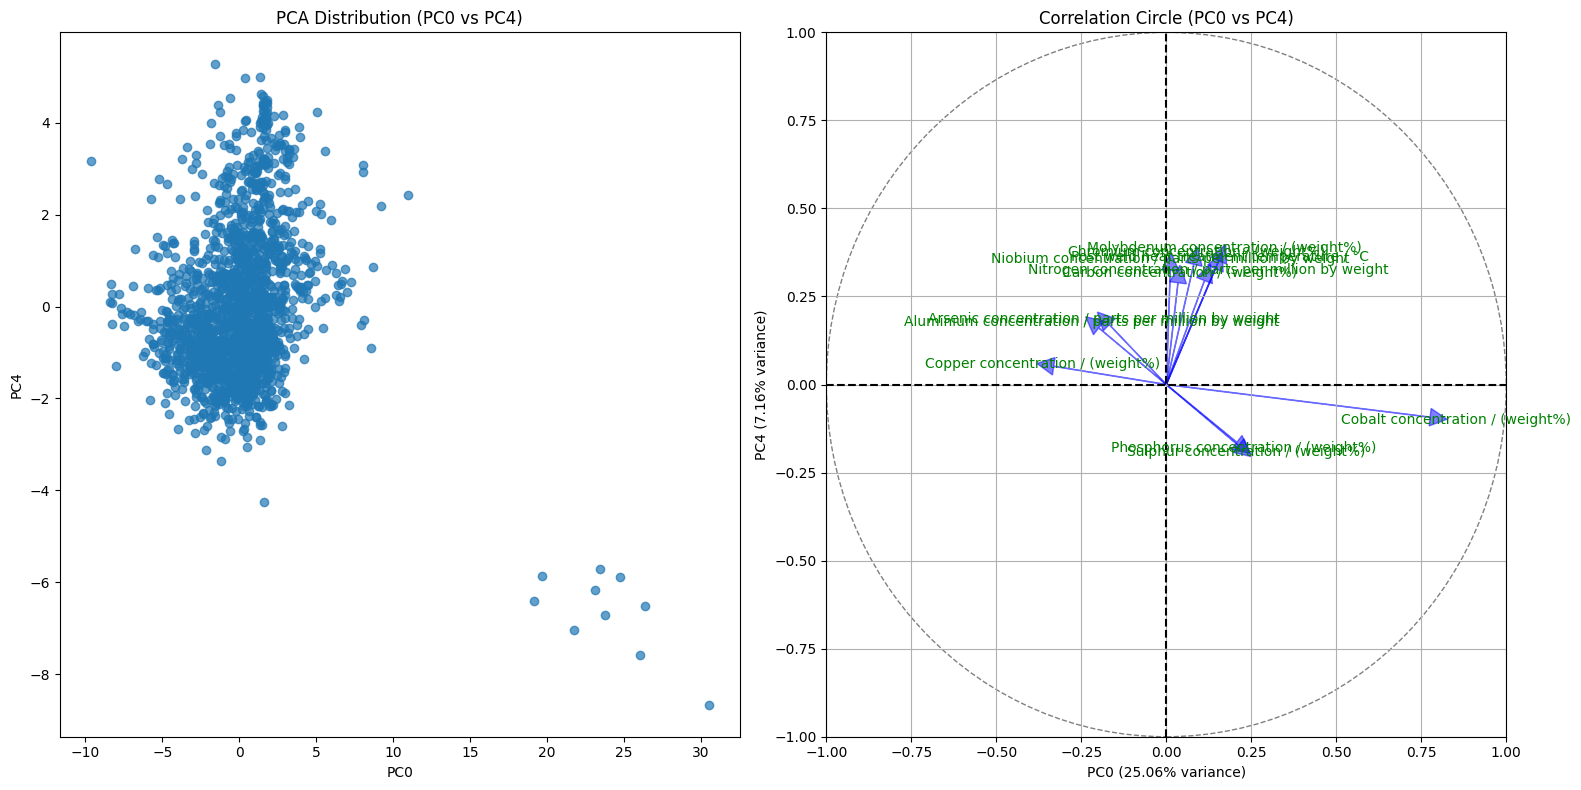

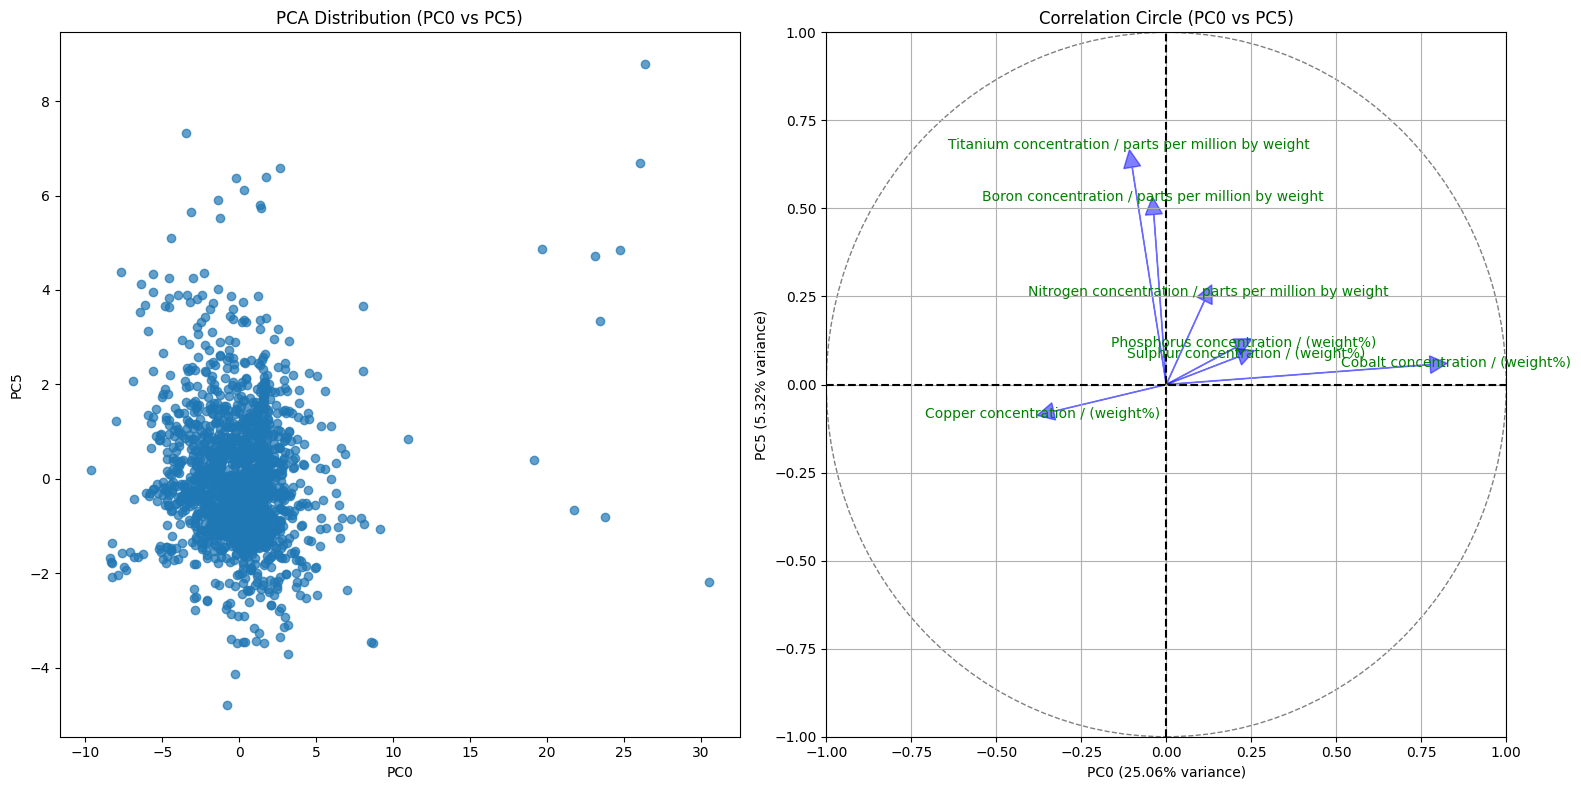

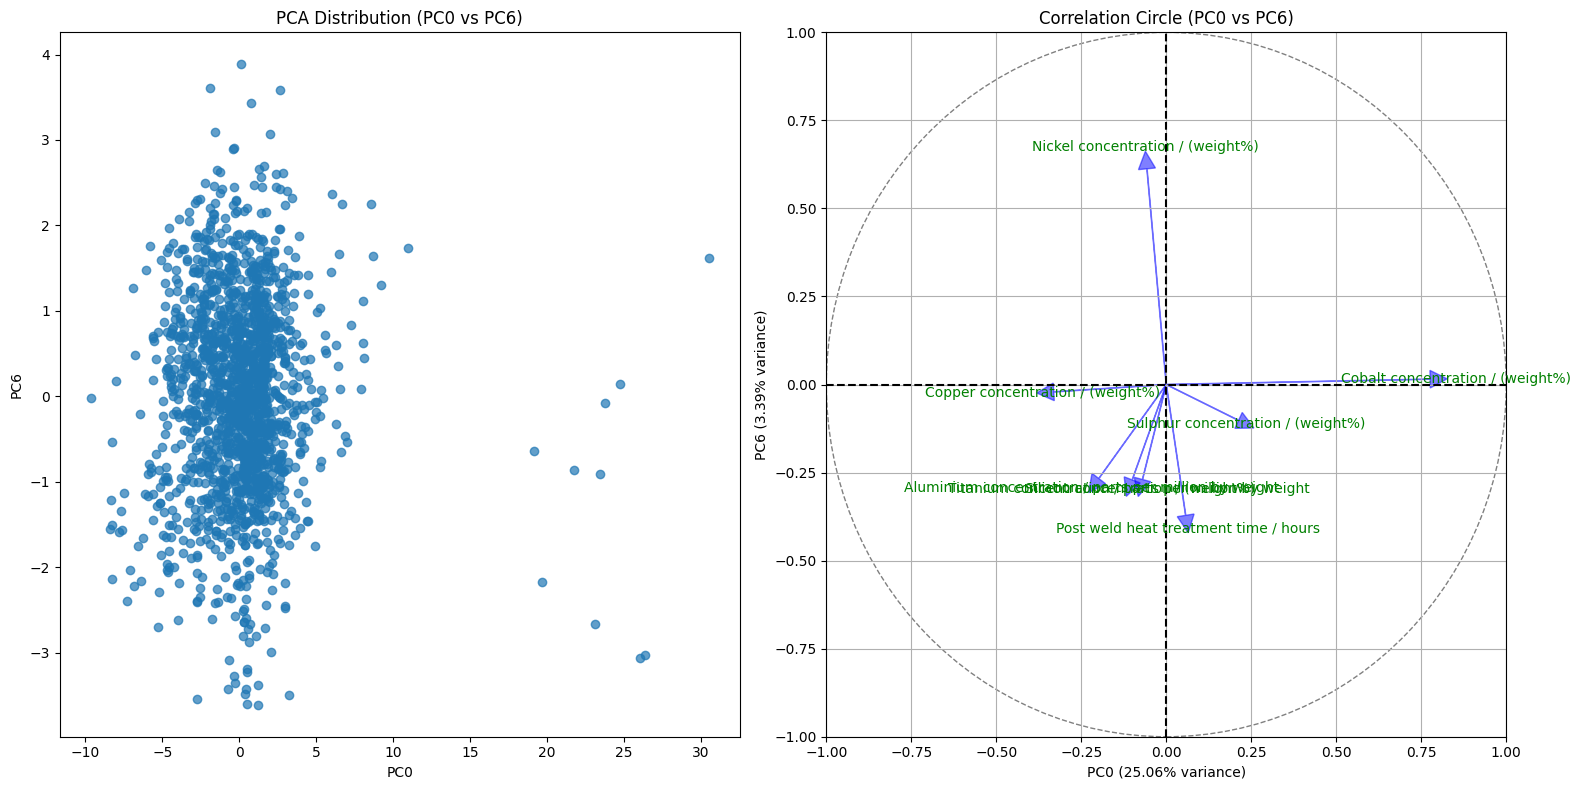

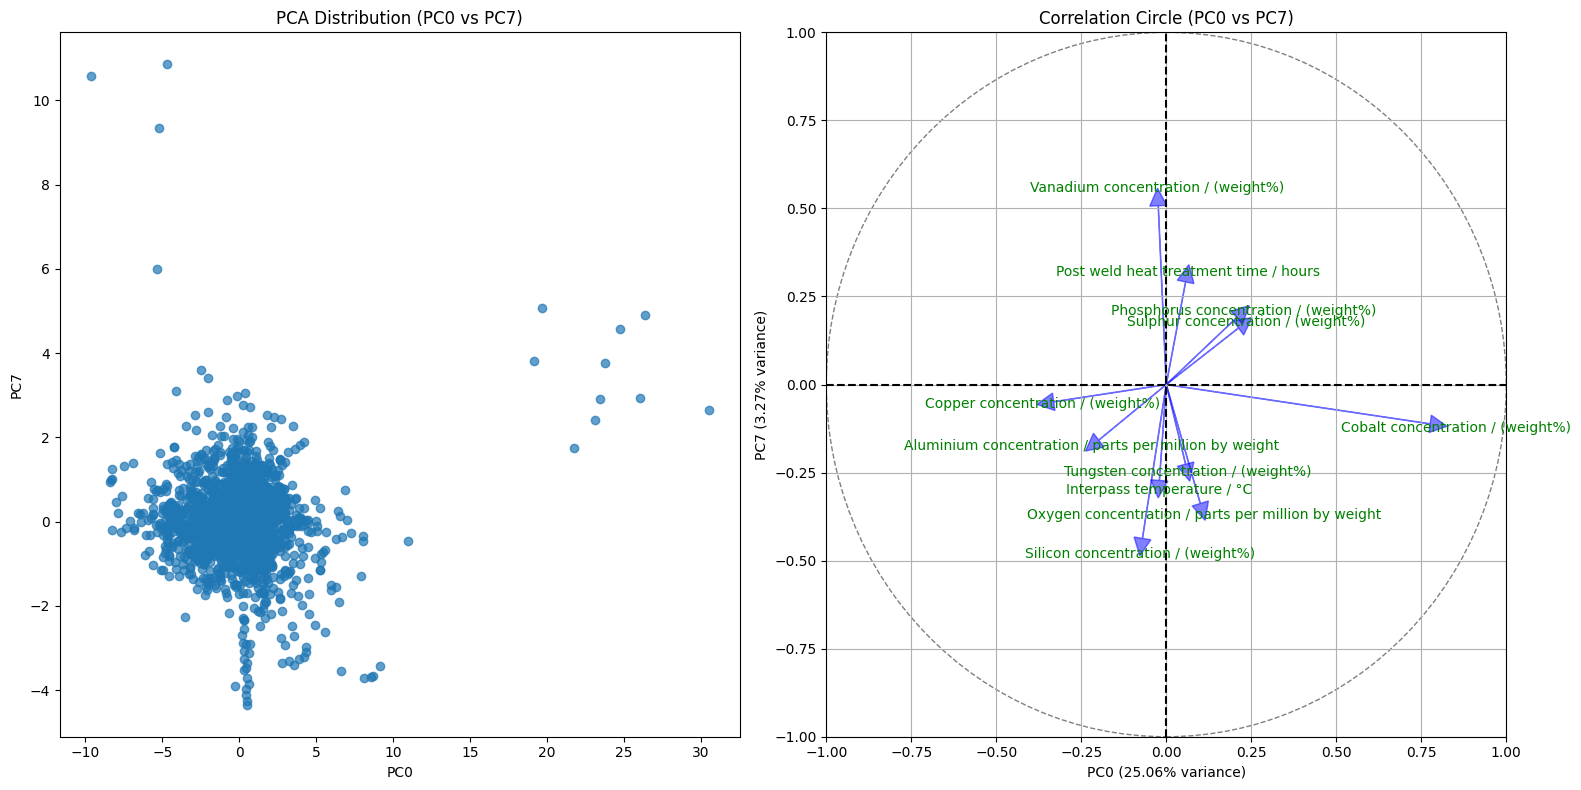

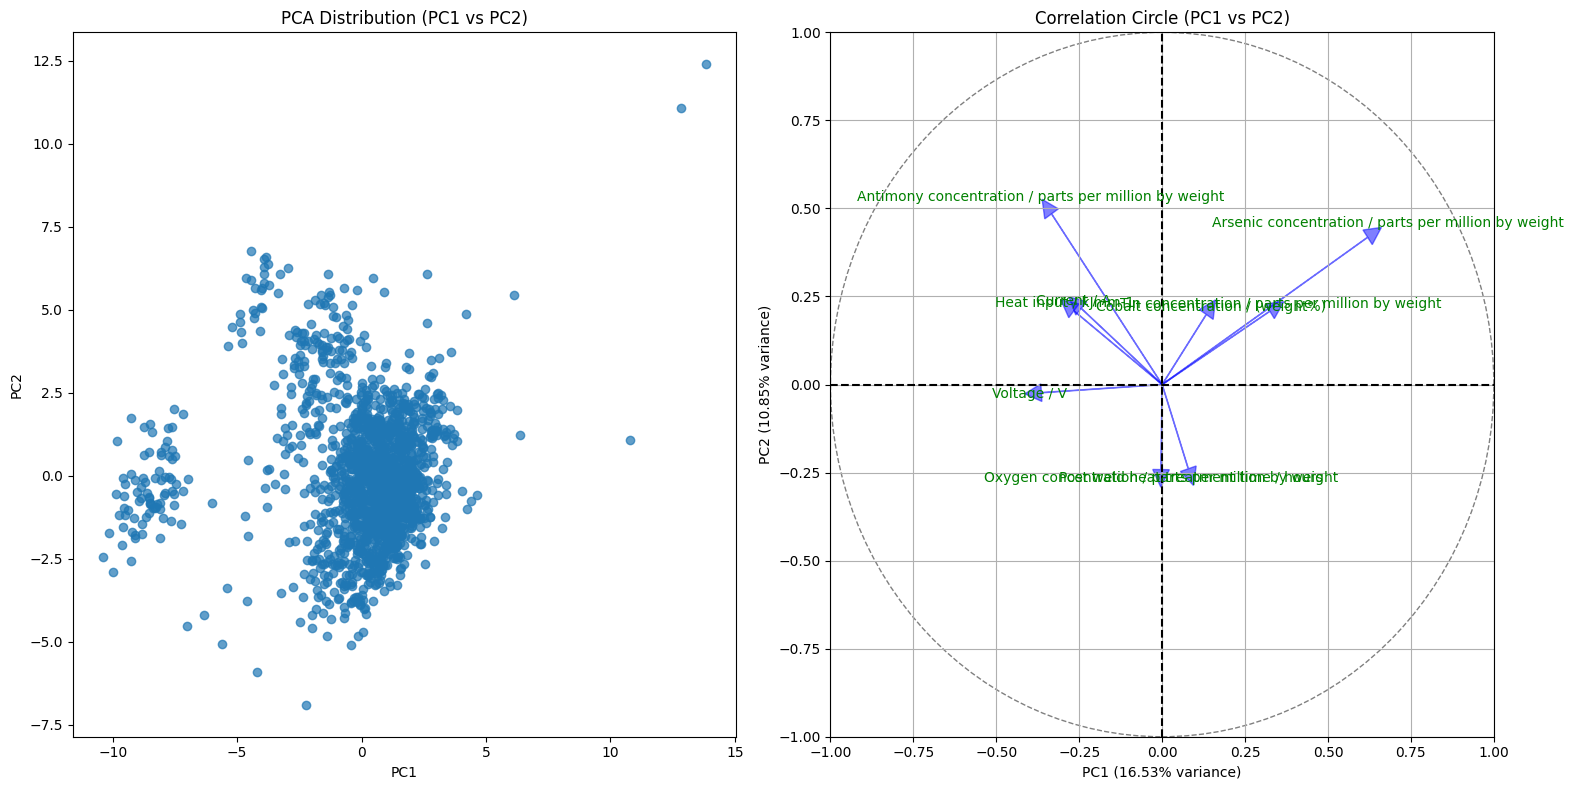

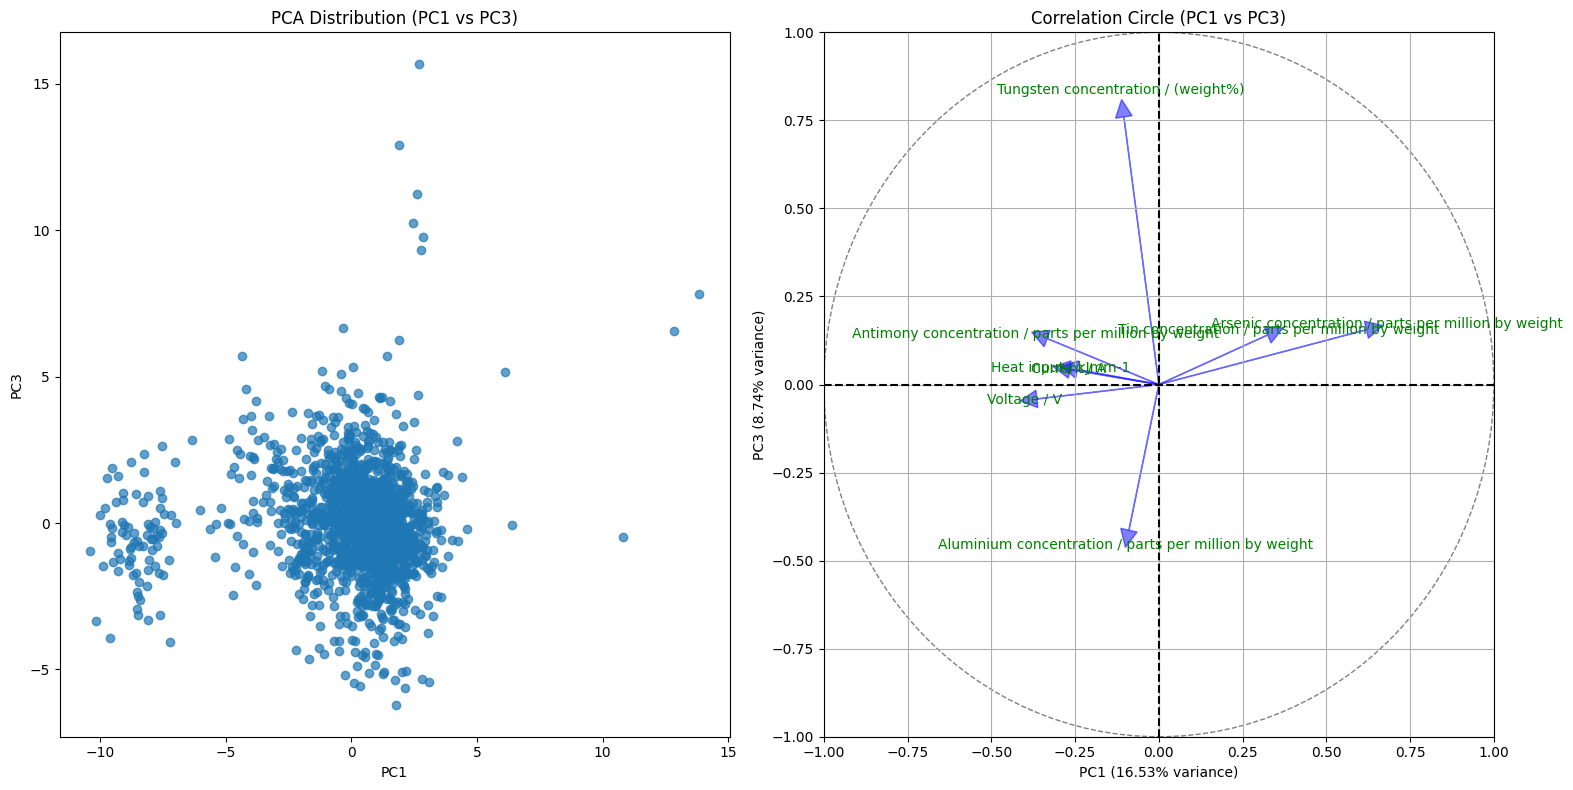

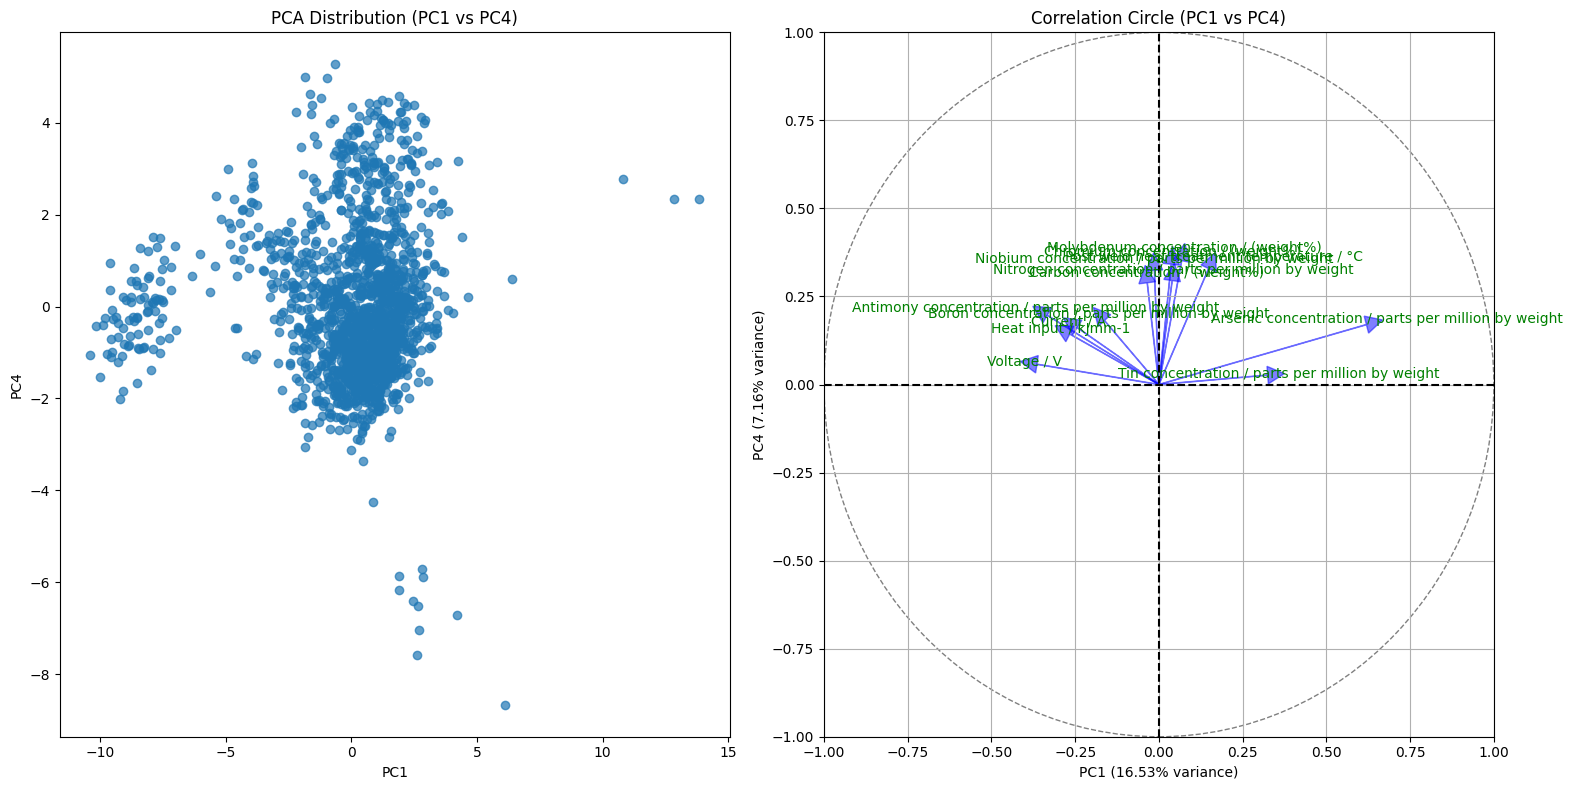

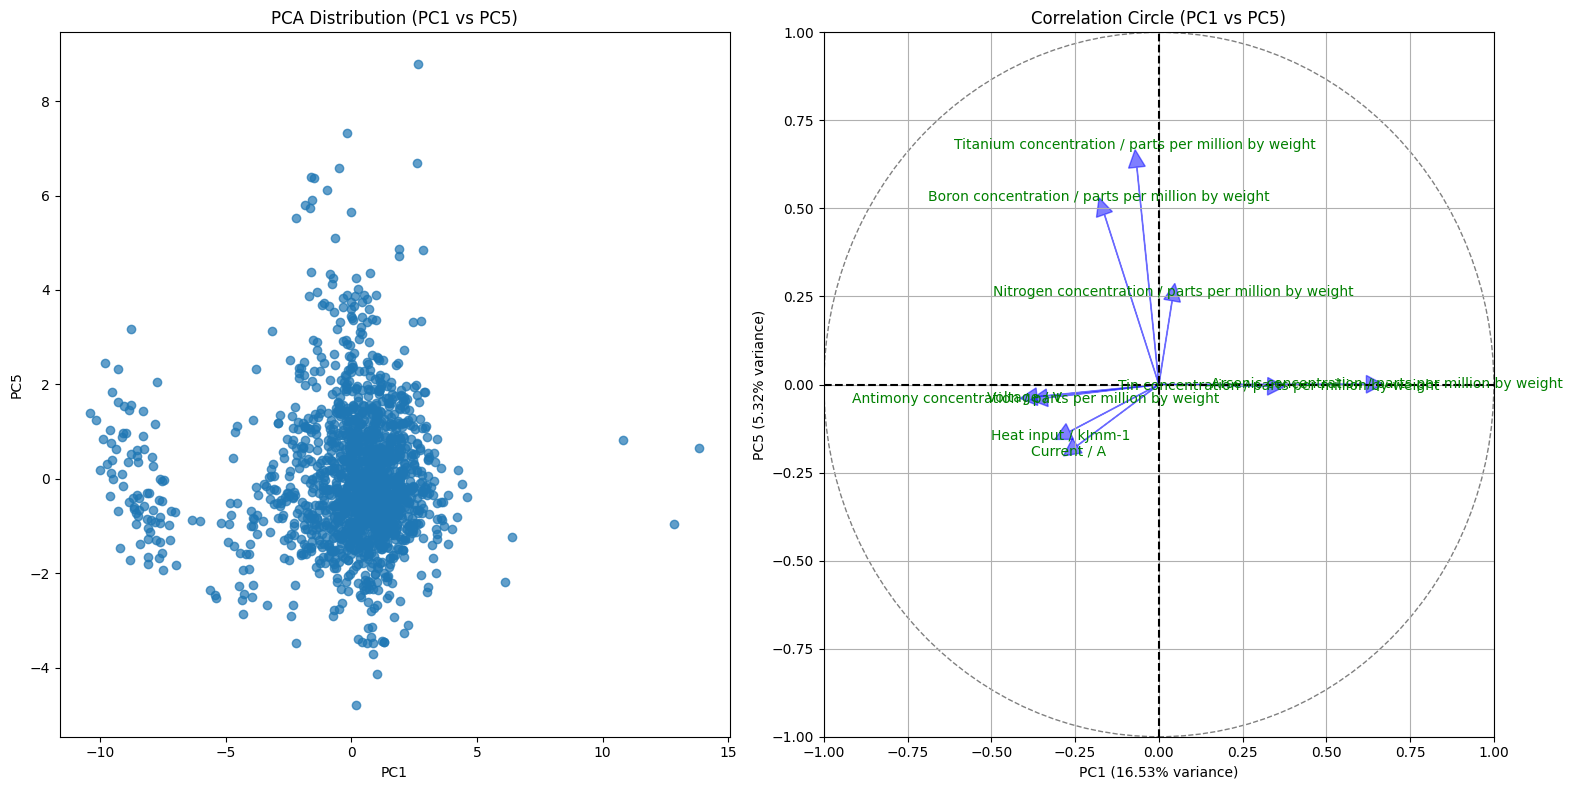

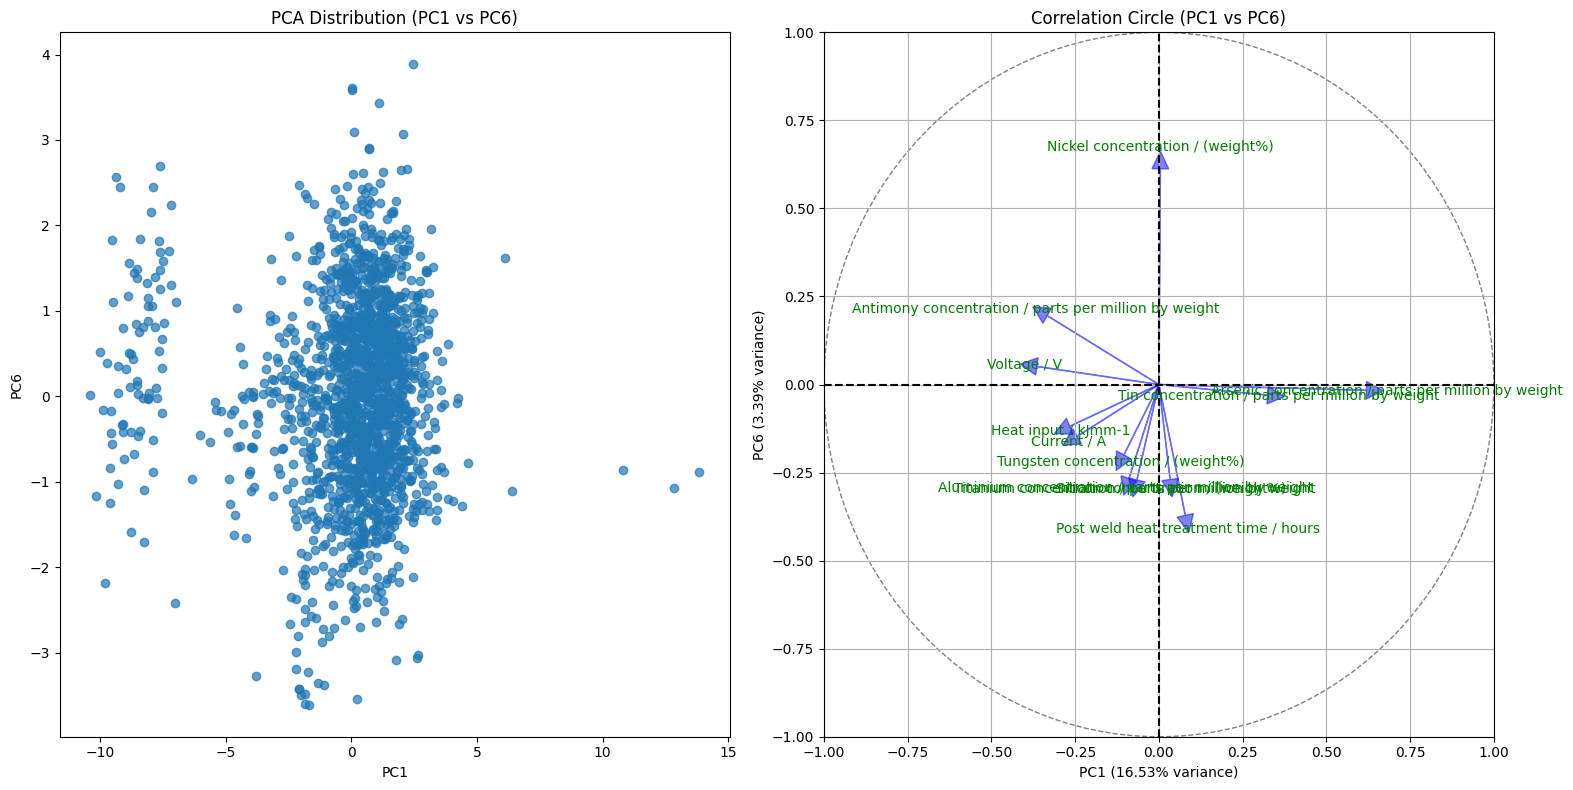

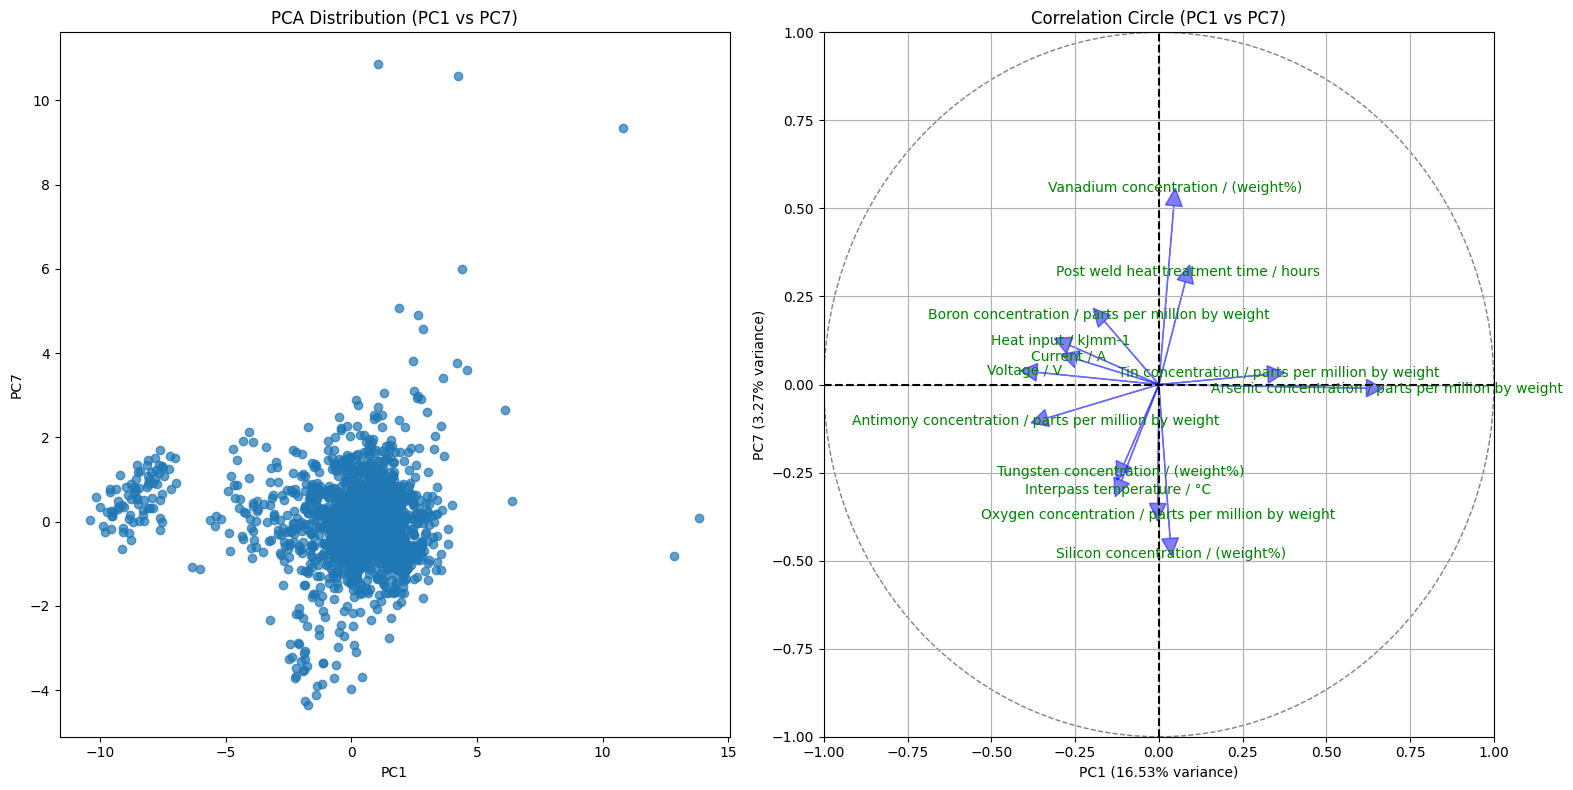

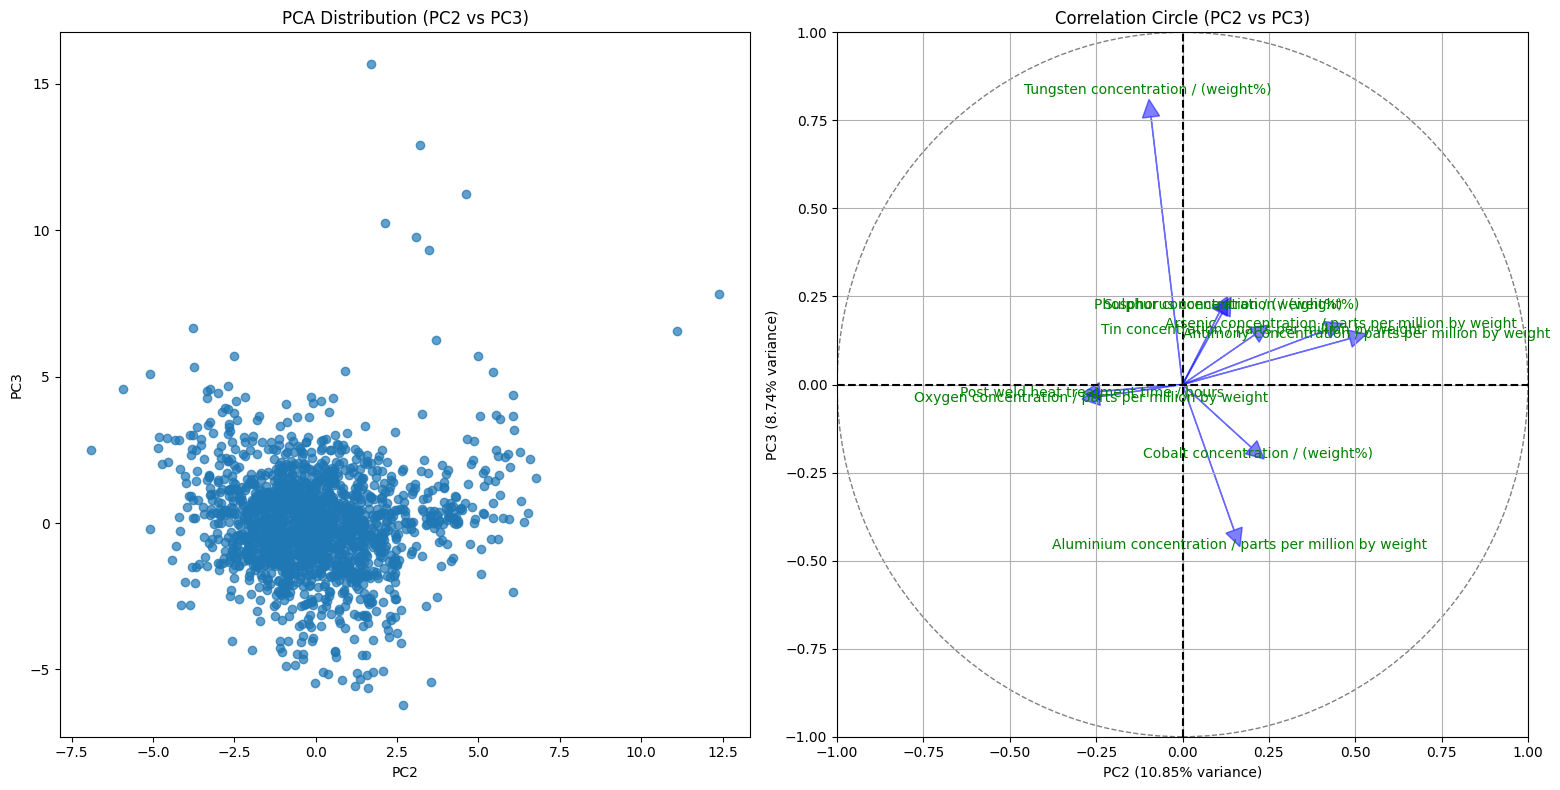

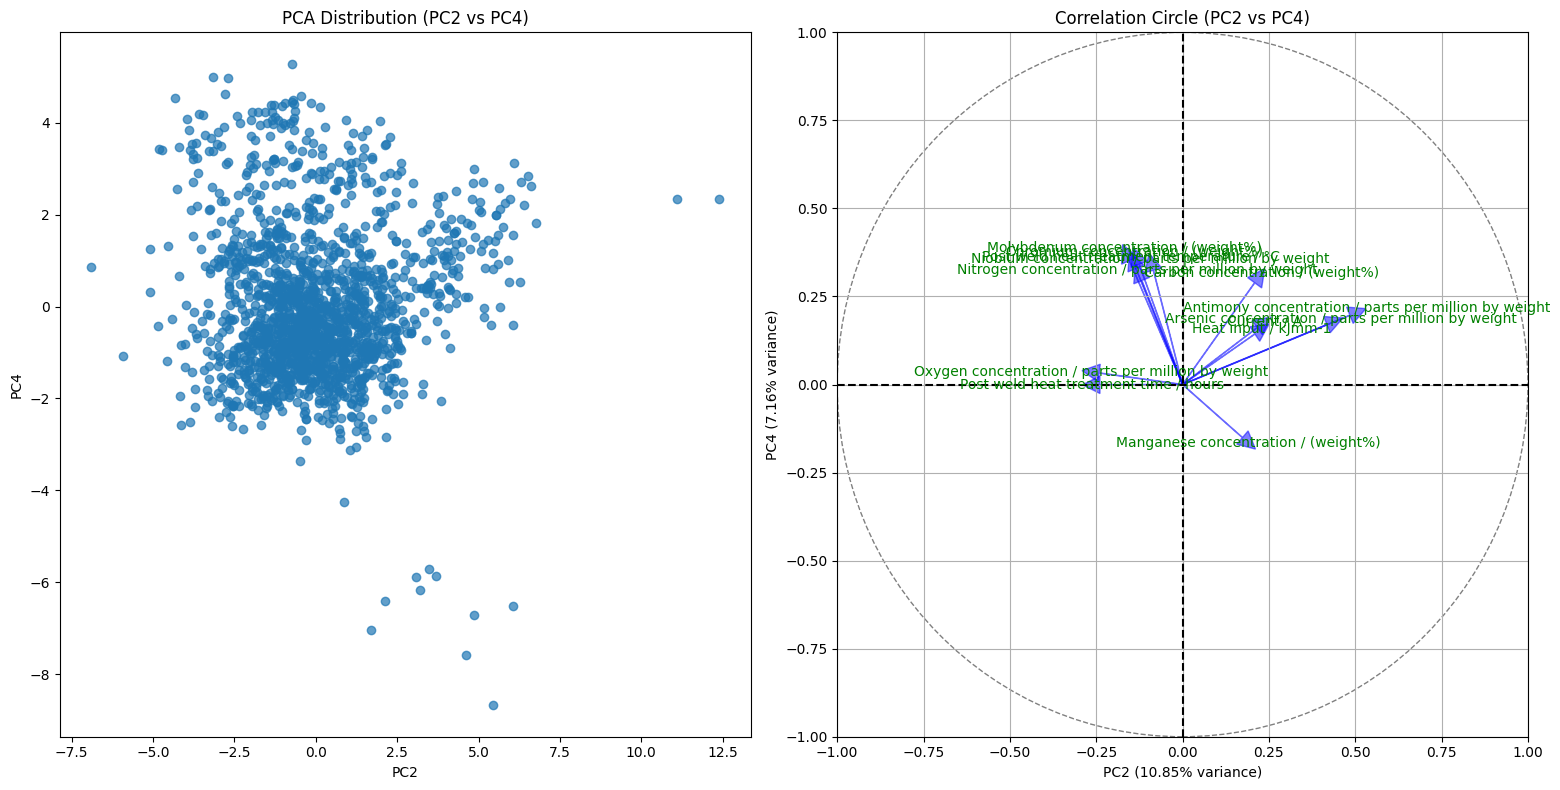

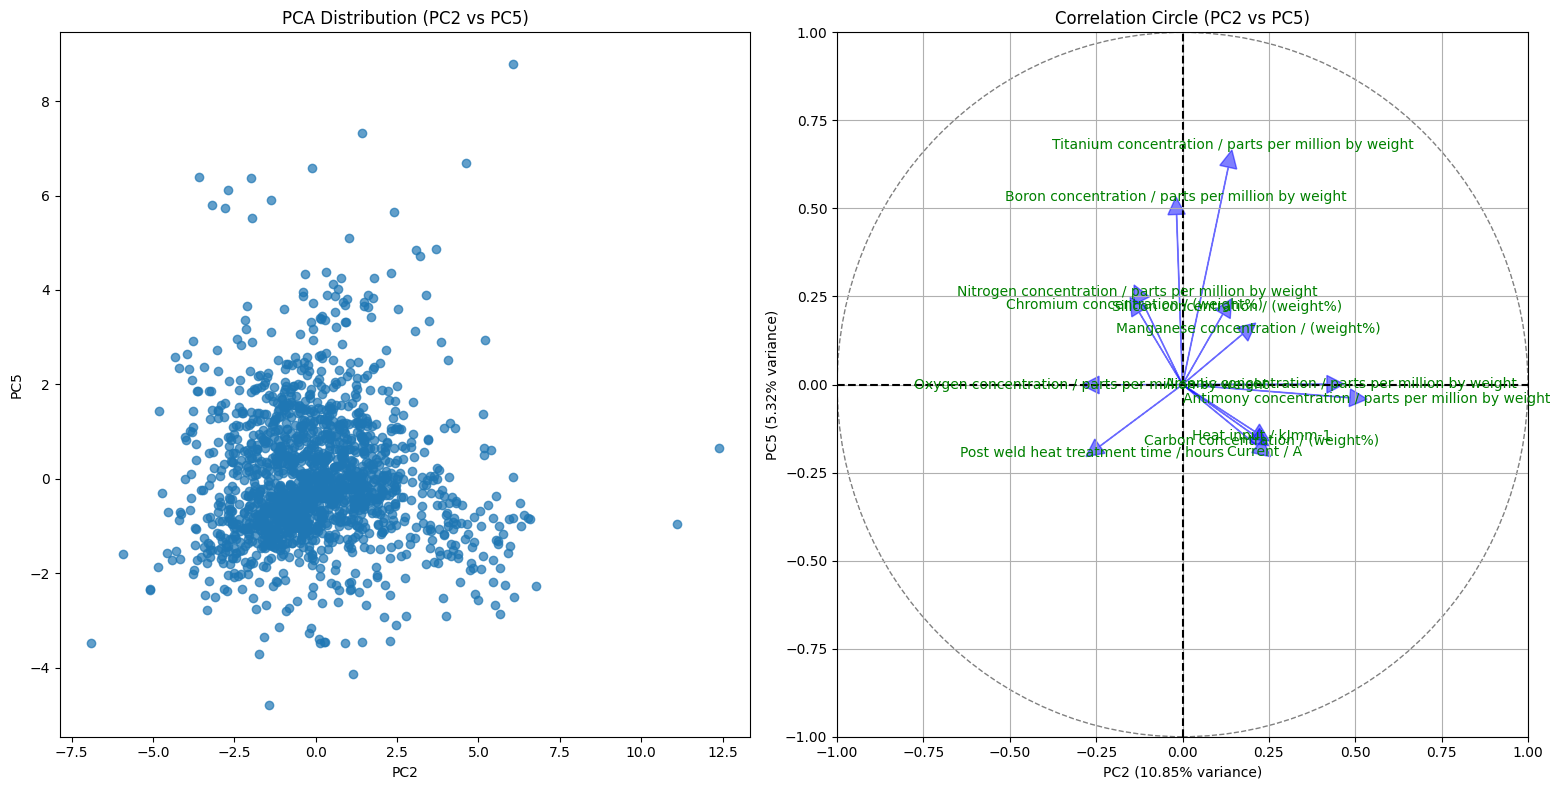

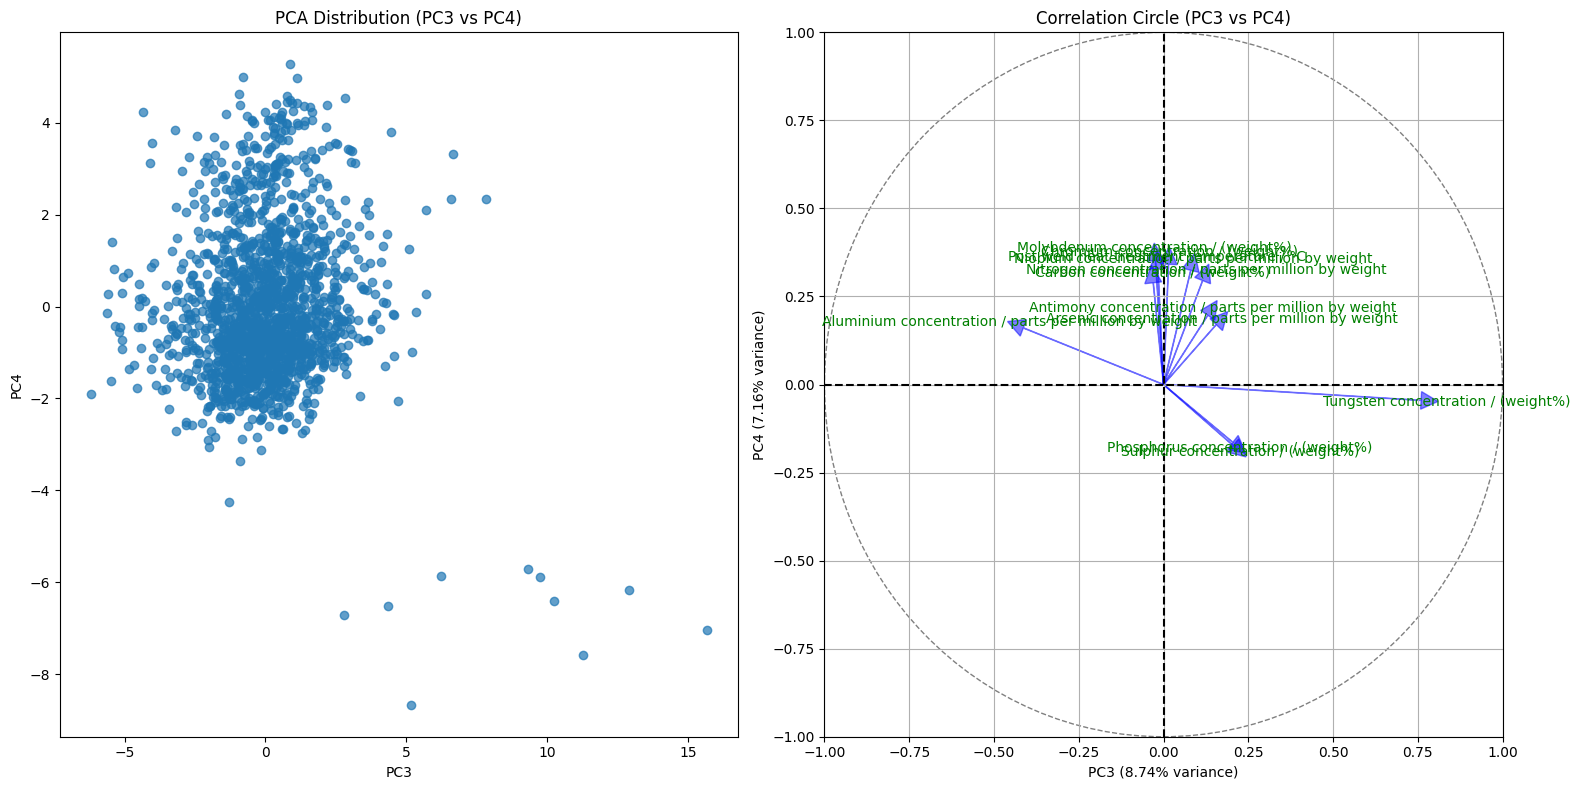

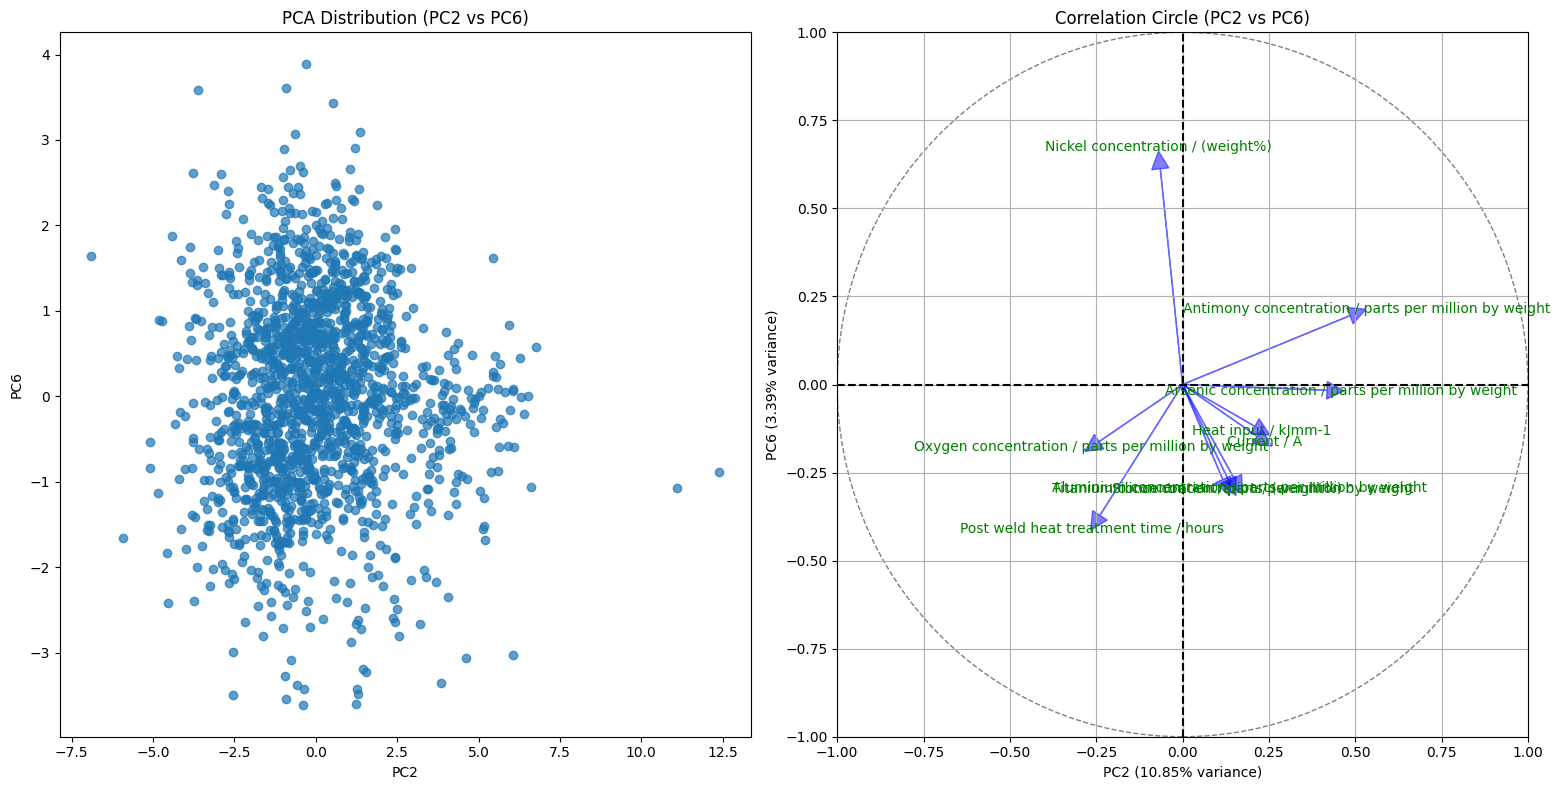

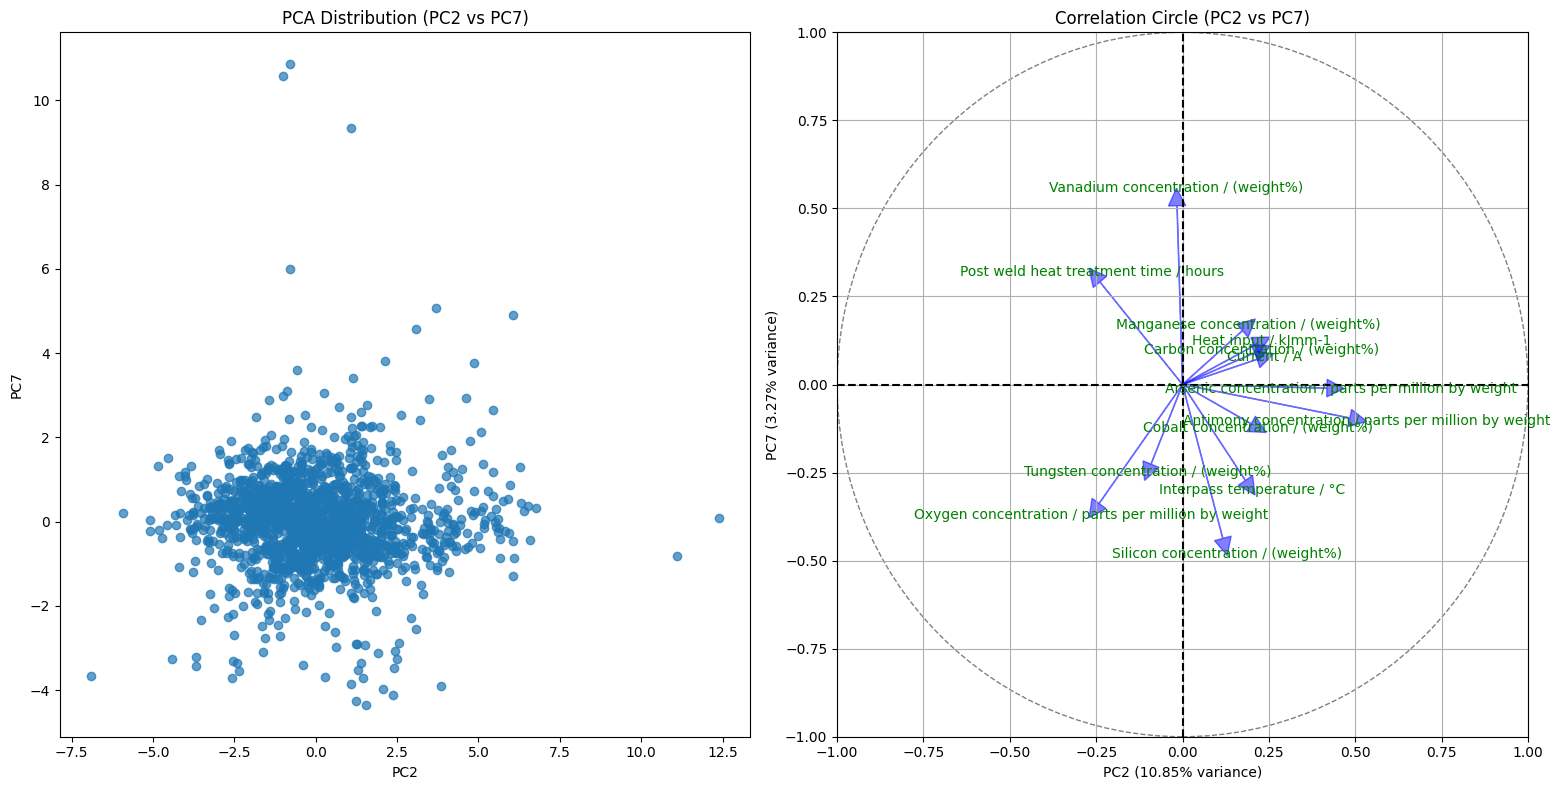

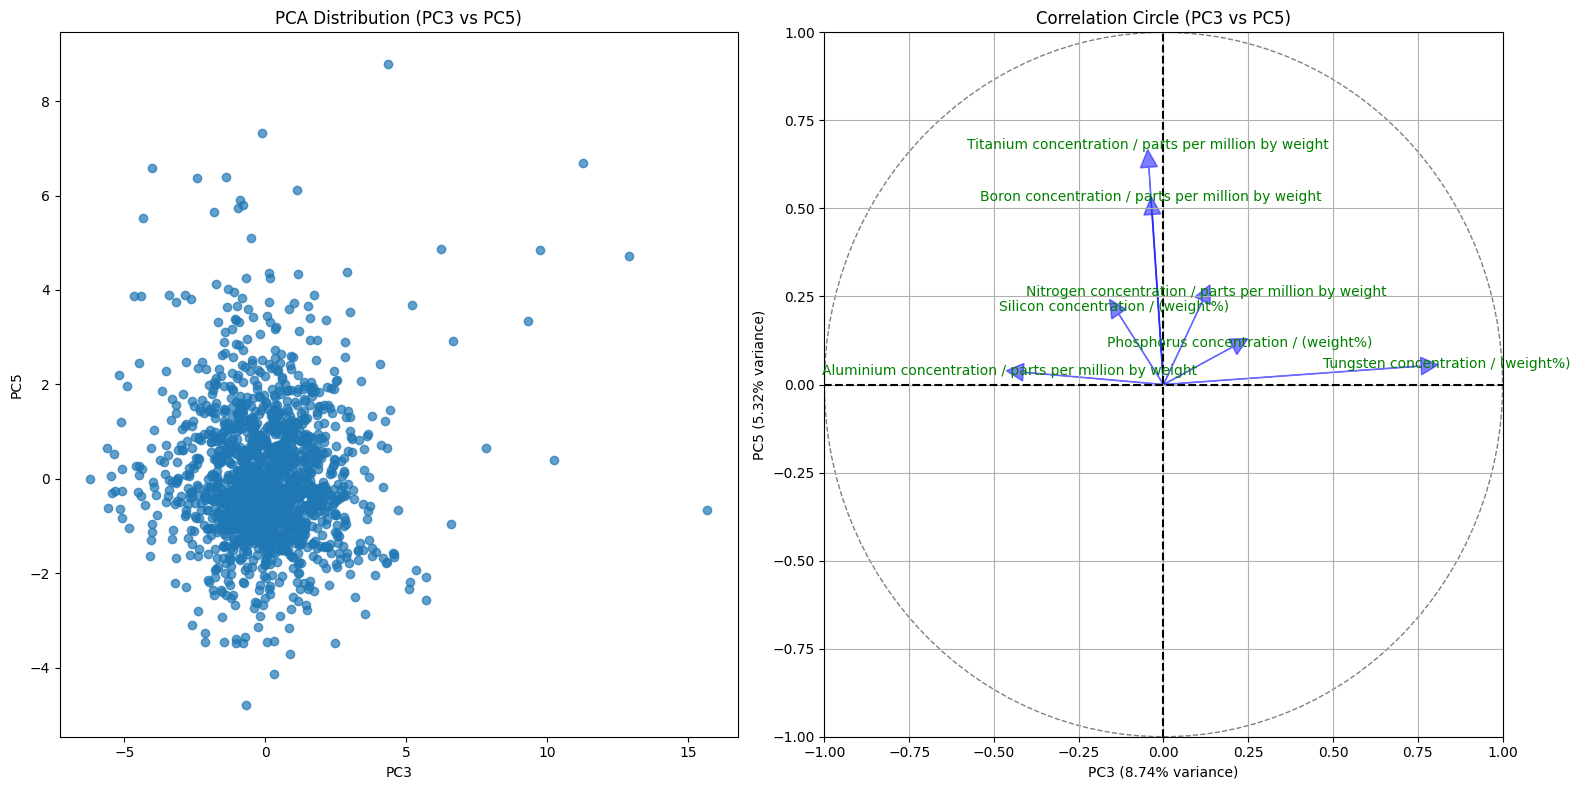

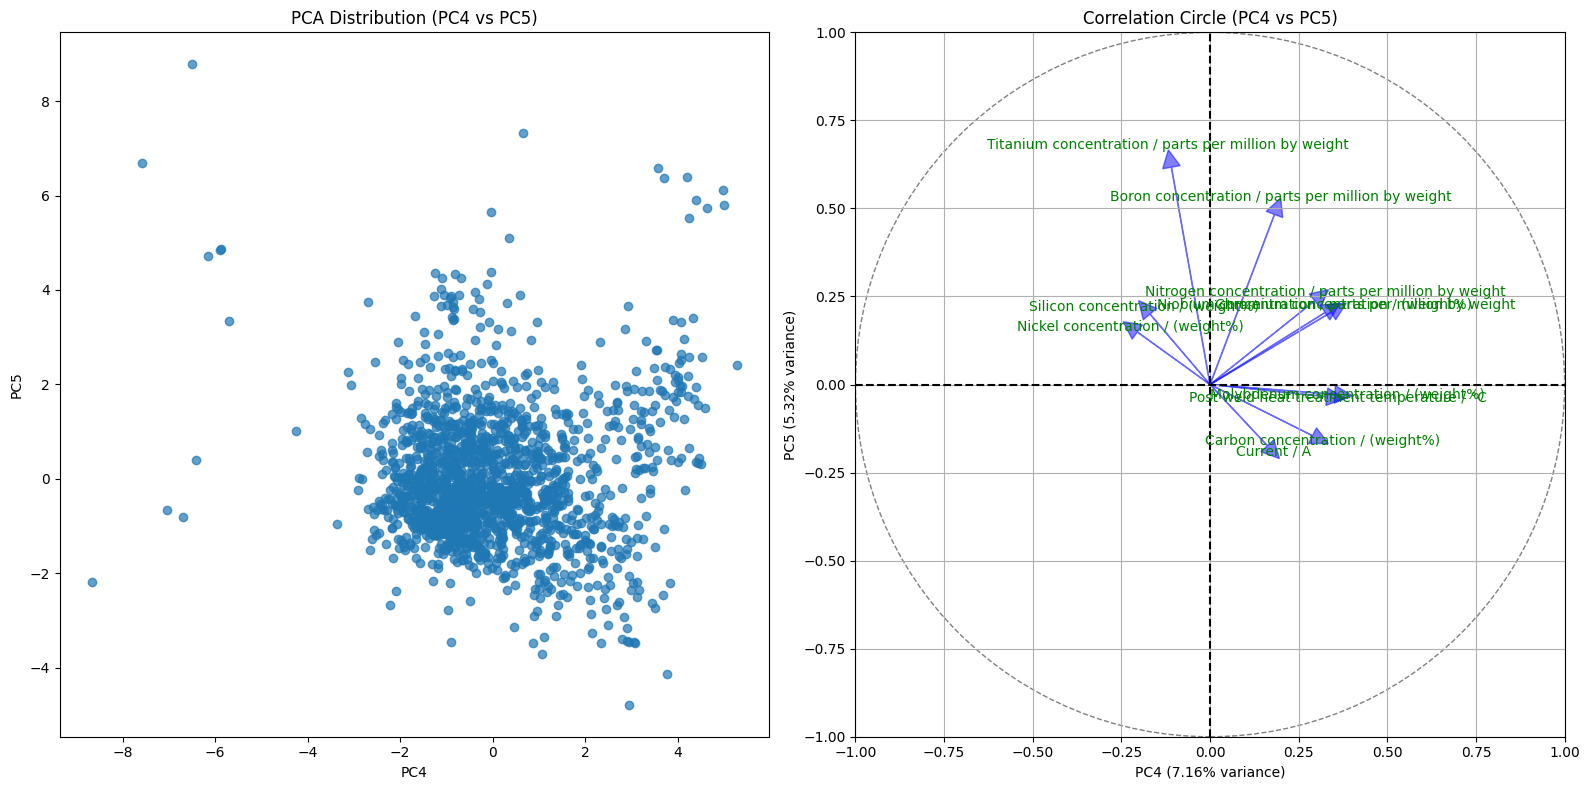

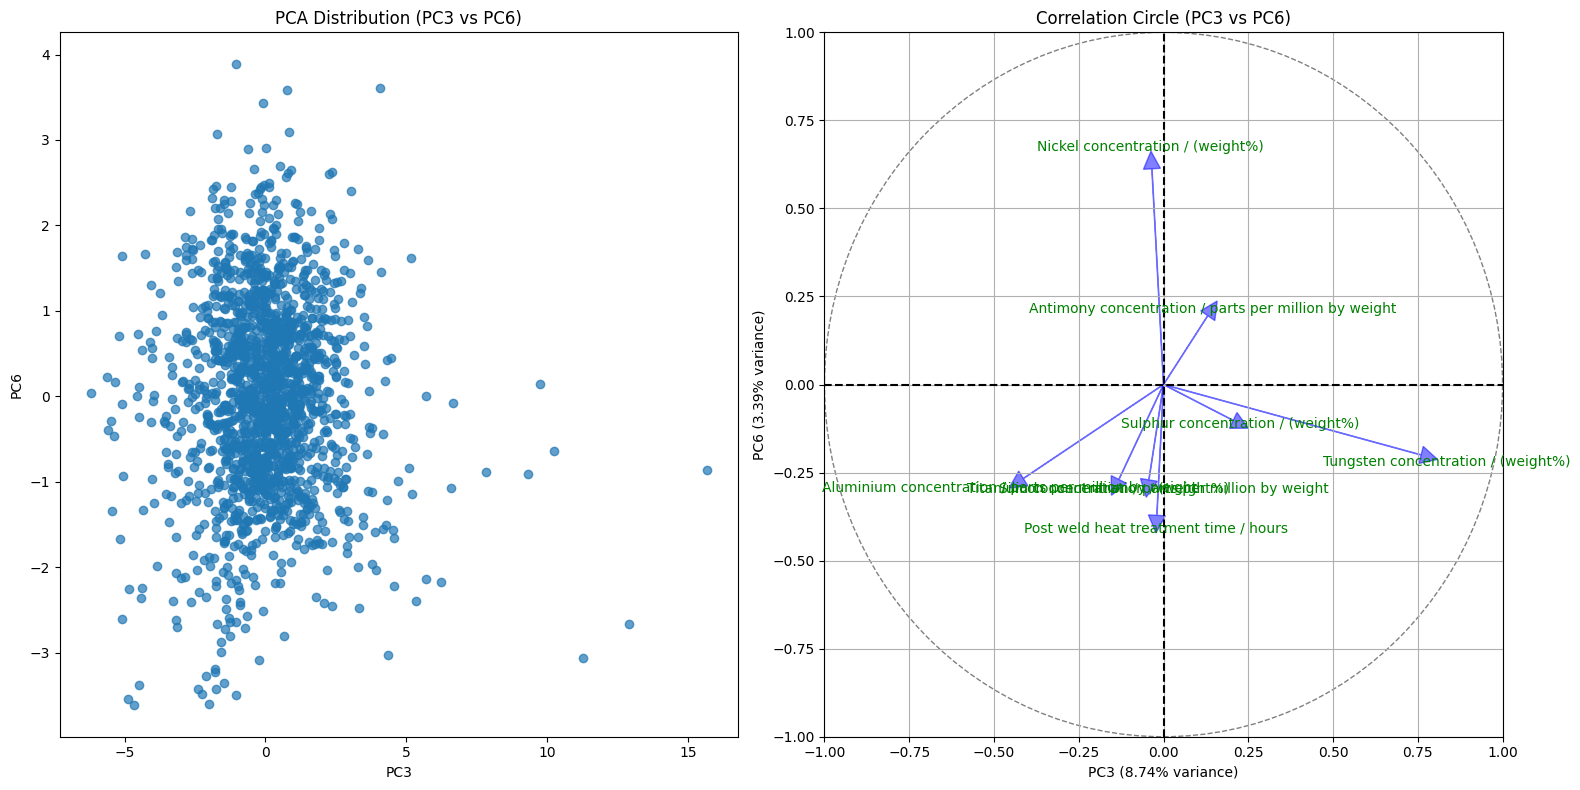

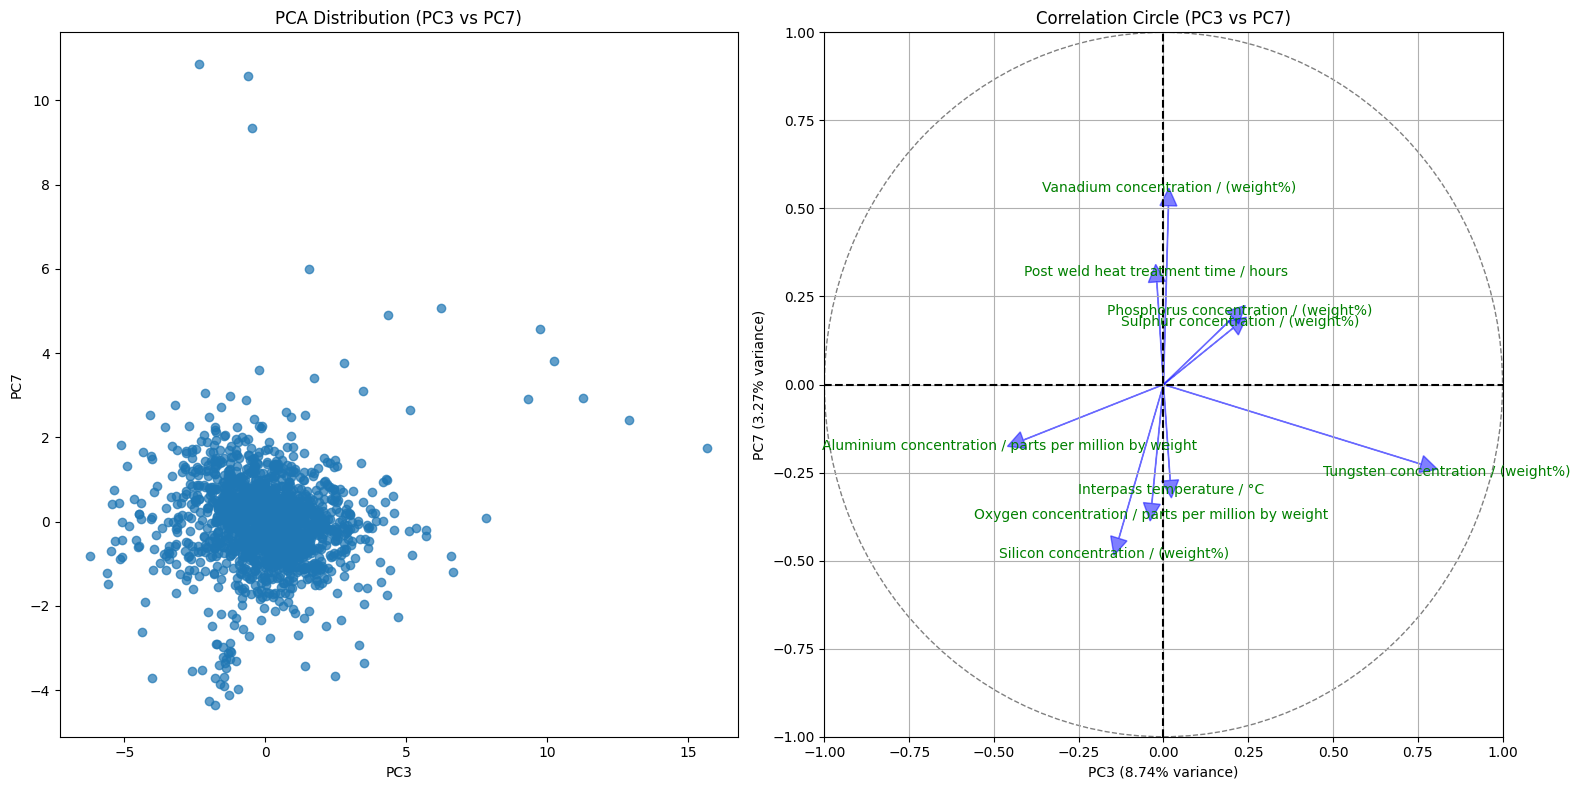

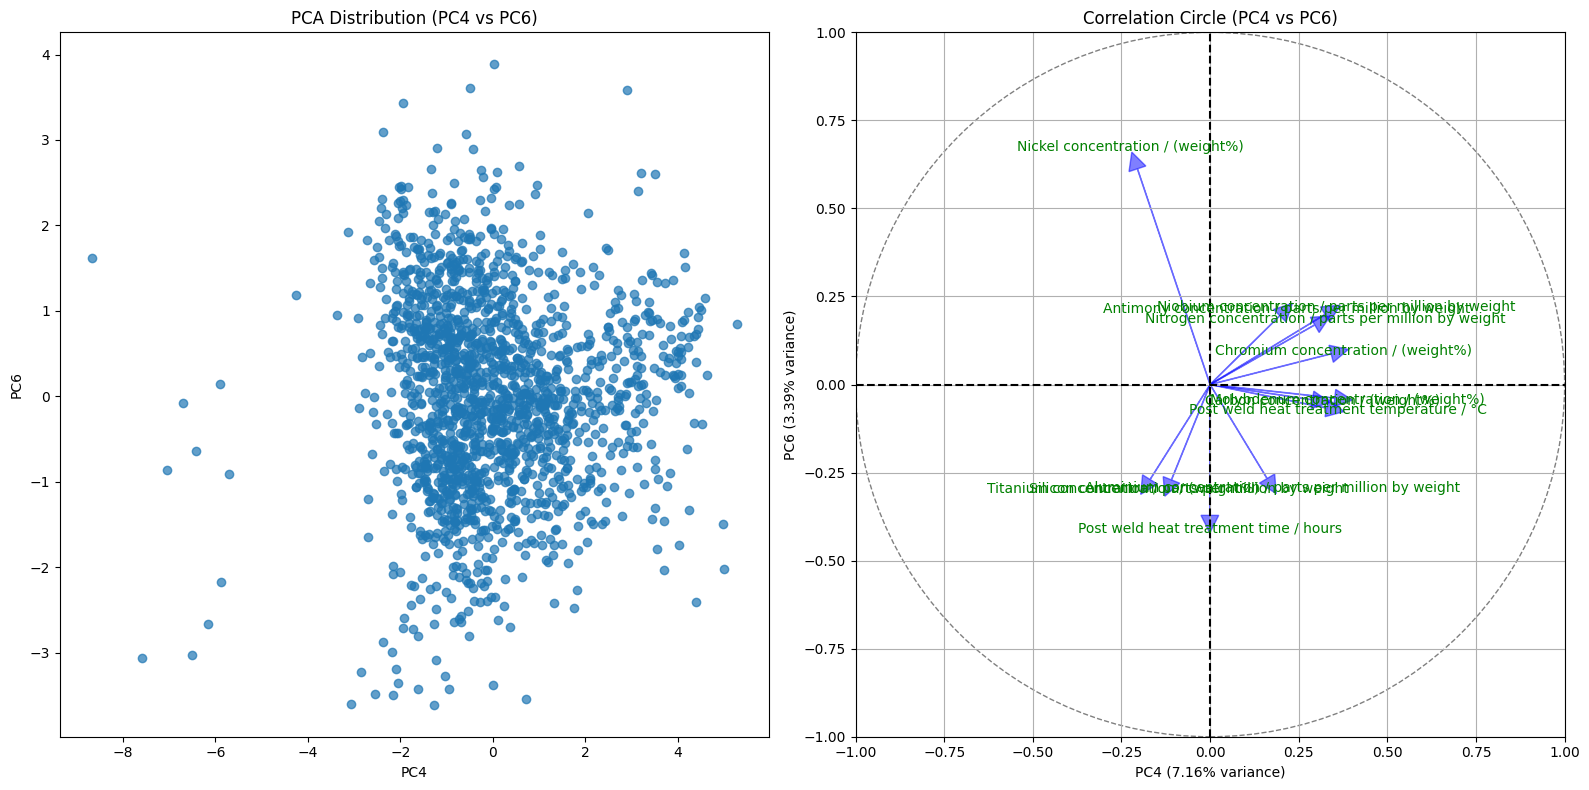

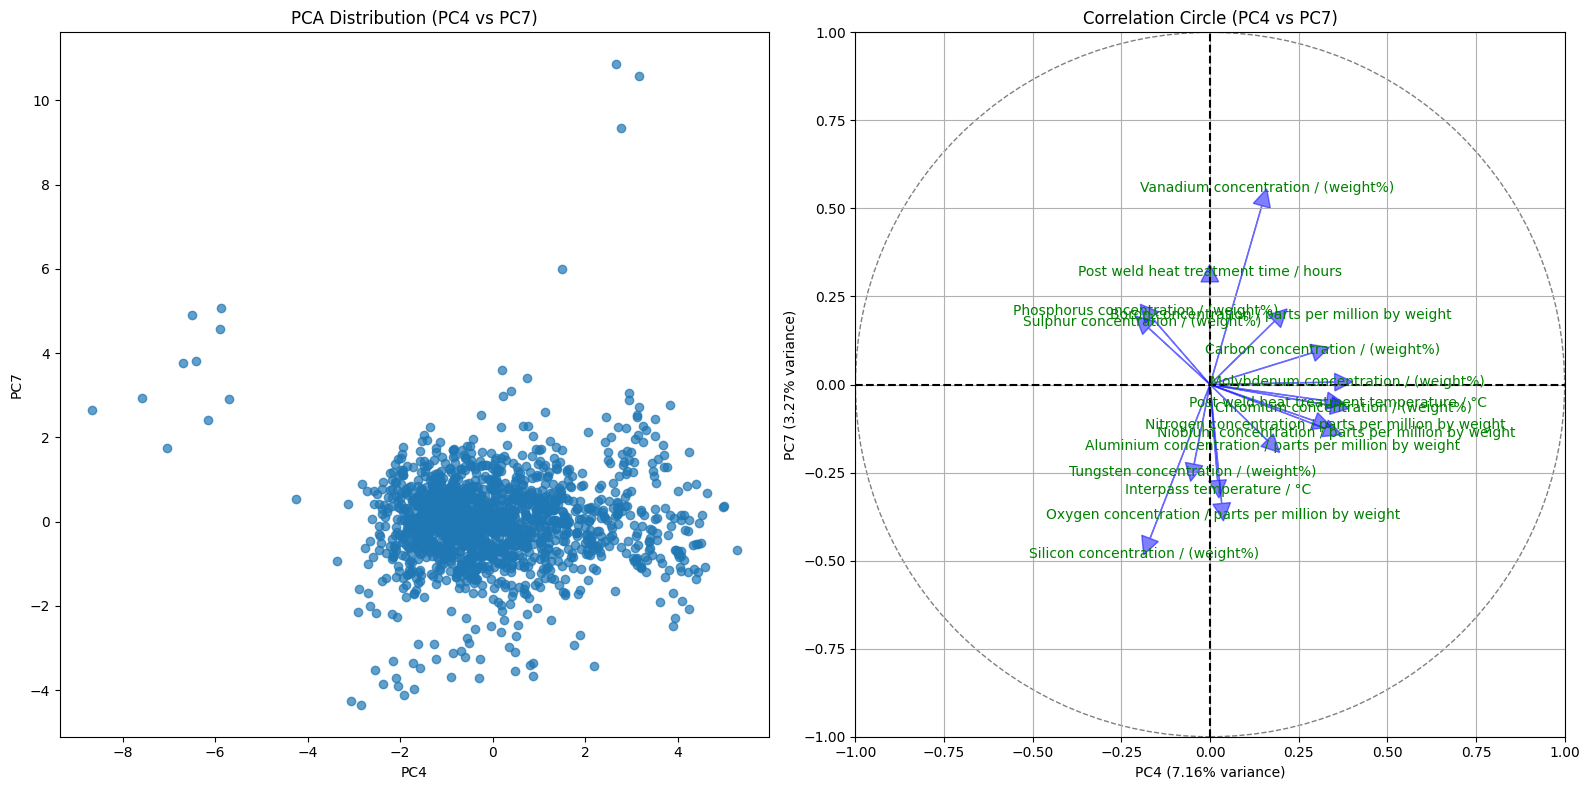

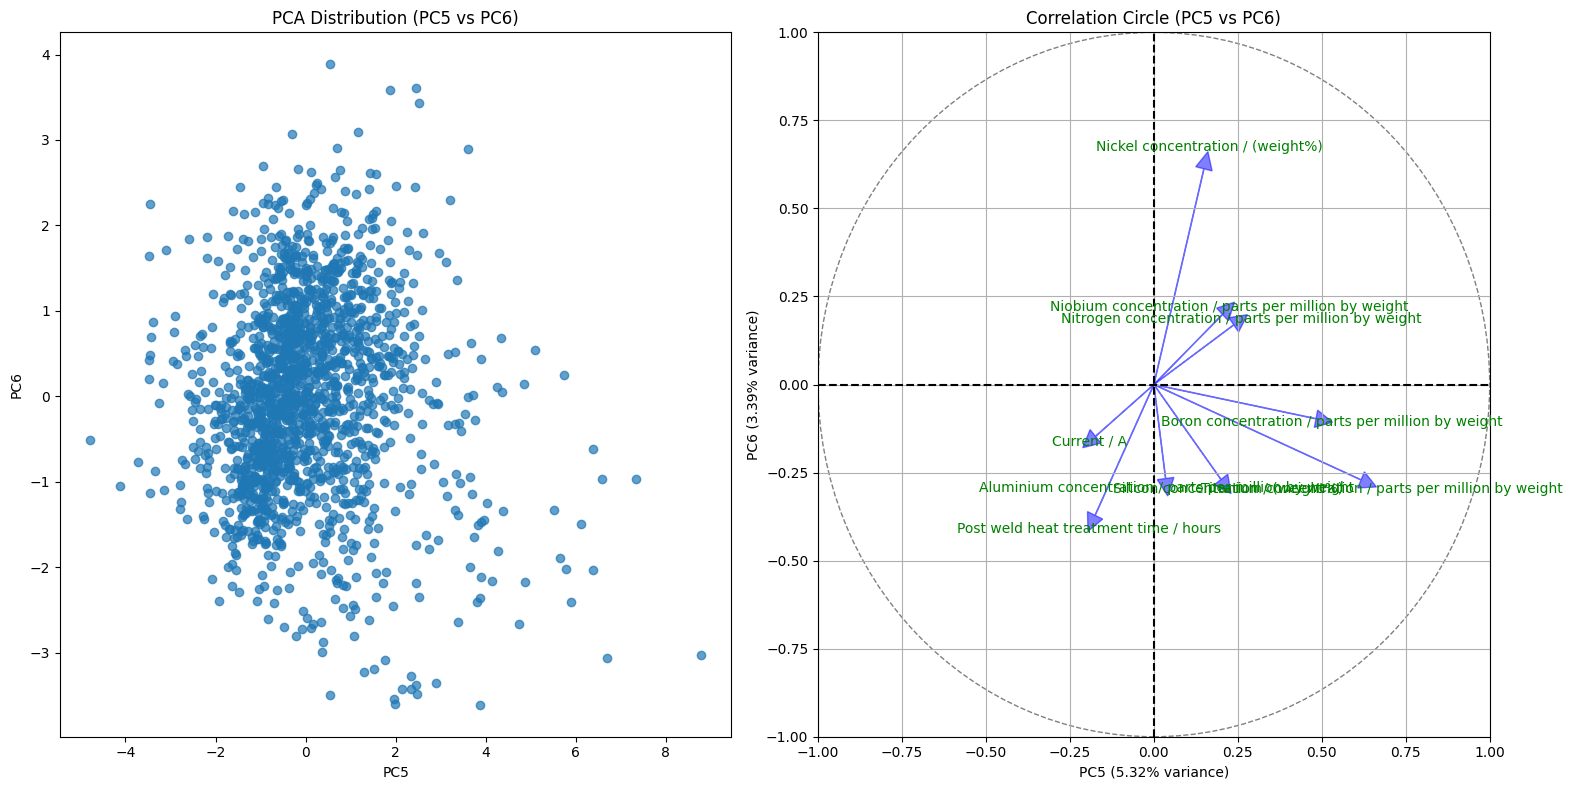

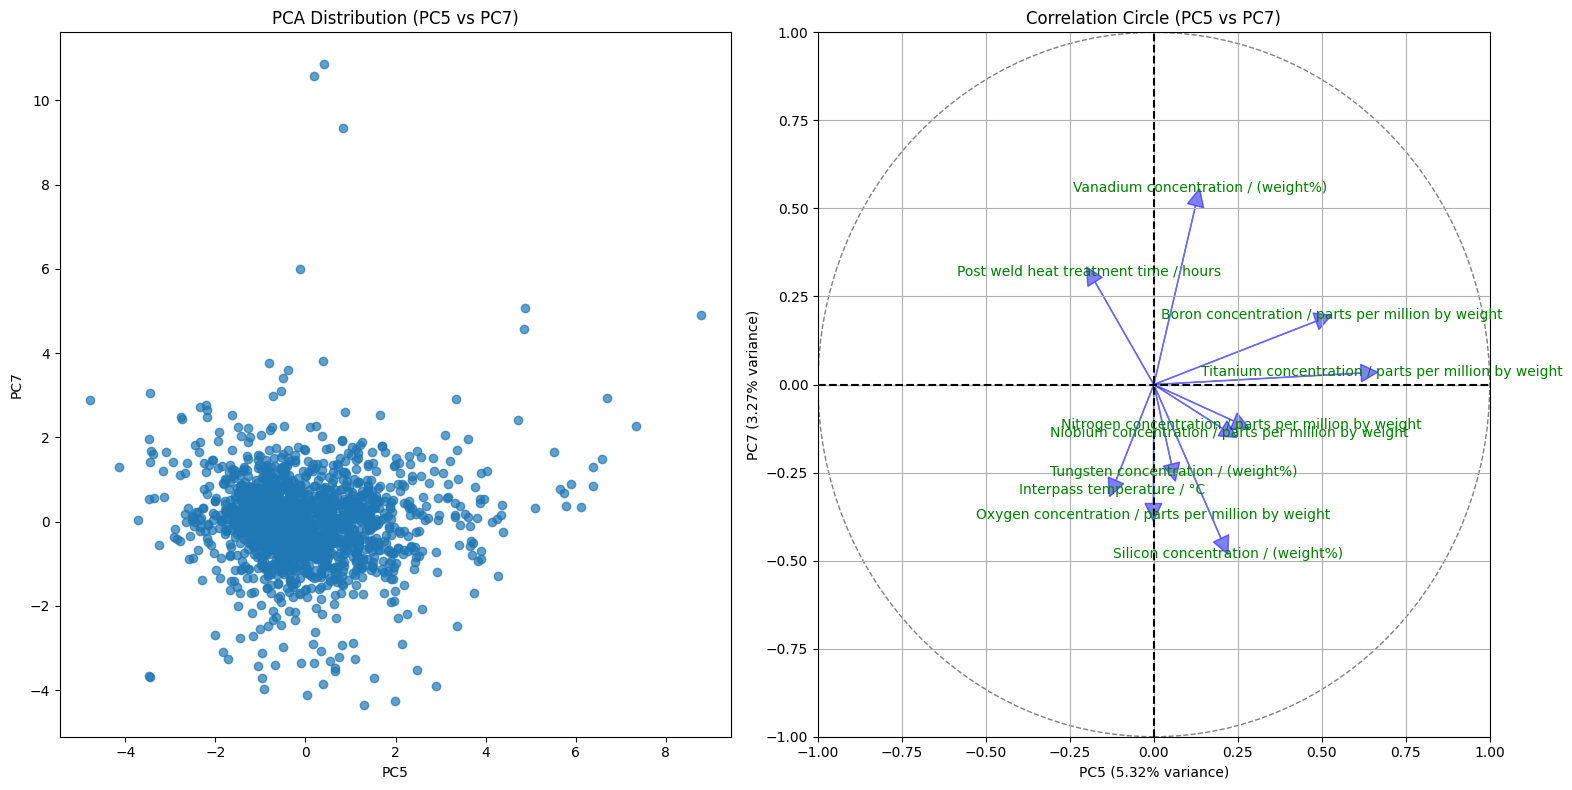

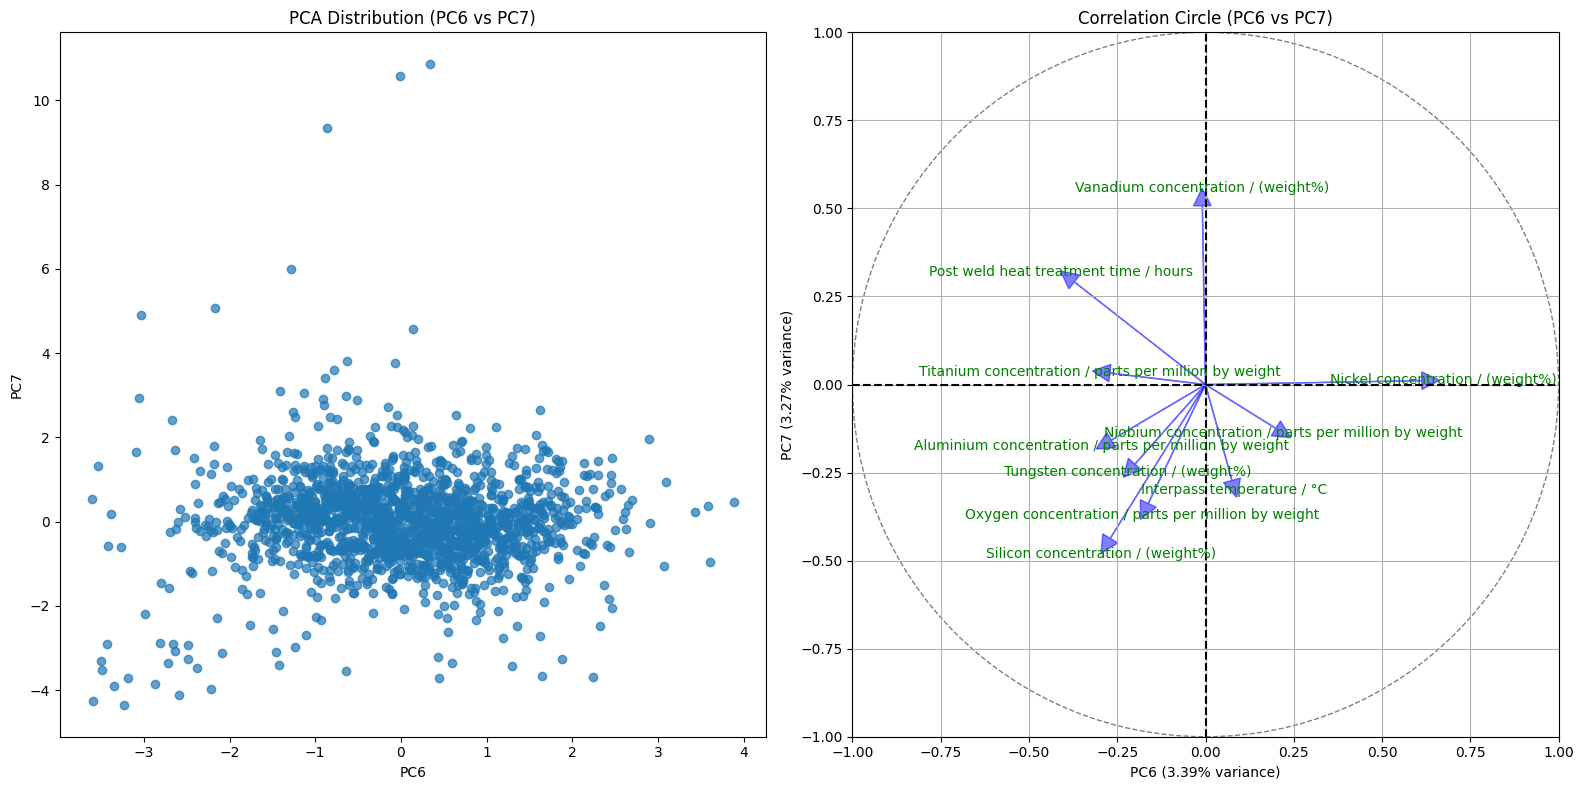

In [8]:
plot_PCA(pca, principal_components, nb_relevant_features, pca_datset.columns)

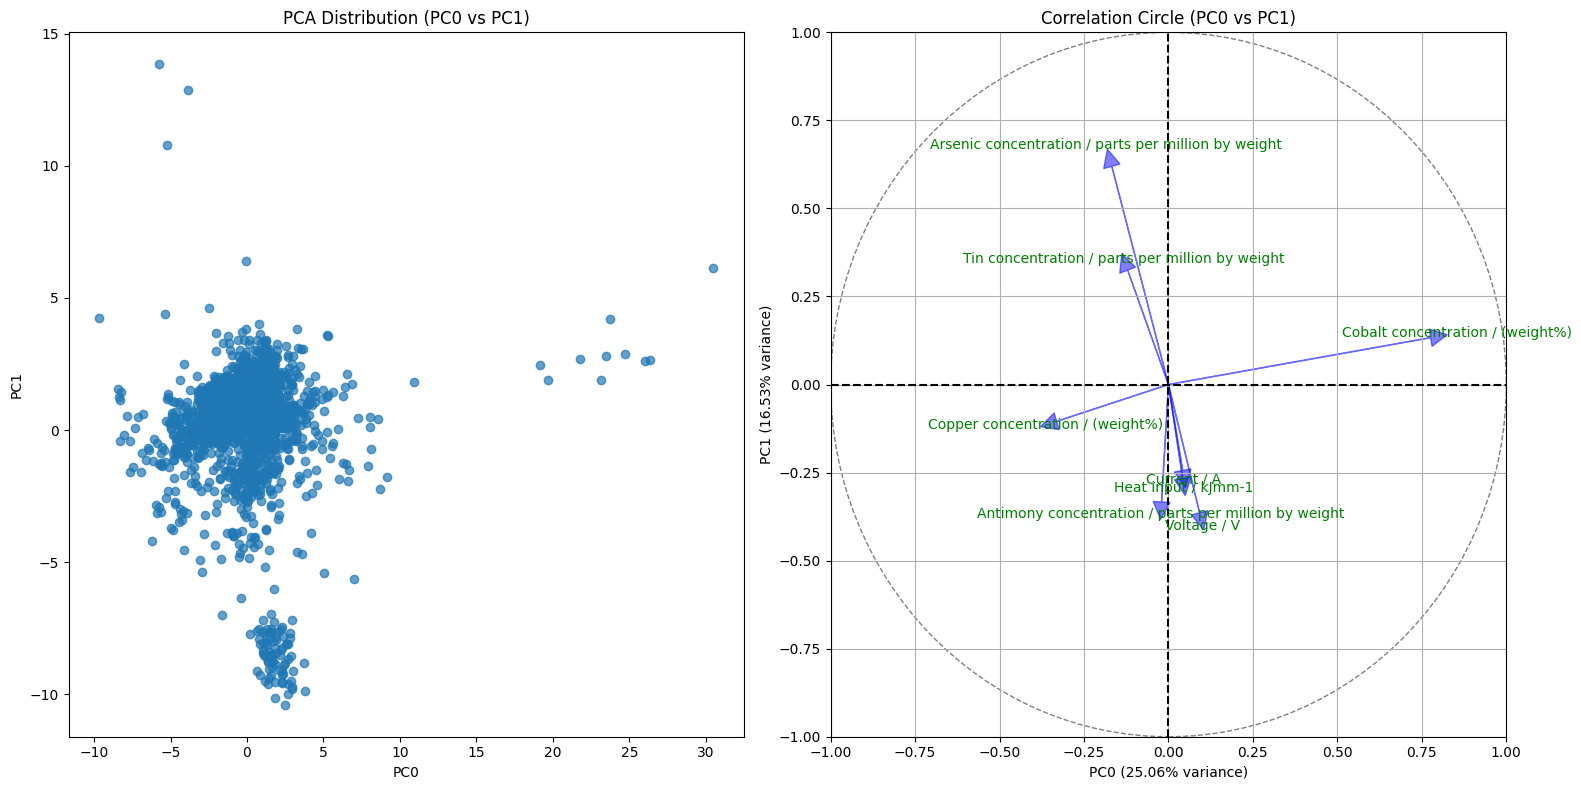

In [9]:
plot_PCA(pca, principal_components, 2, pca_datset.columns)

The features most correlated with the first principal componants are the ones most resembling a normal distribution and for which no value was imputed 

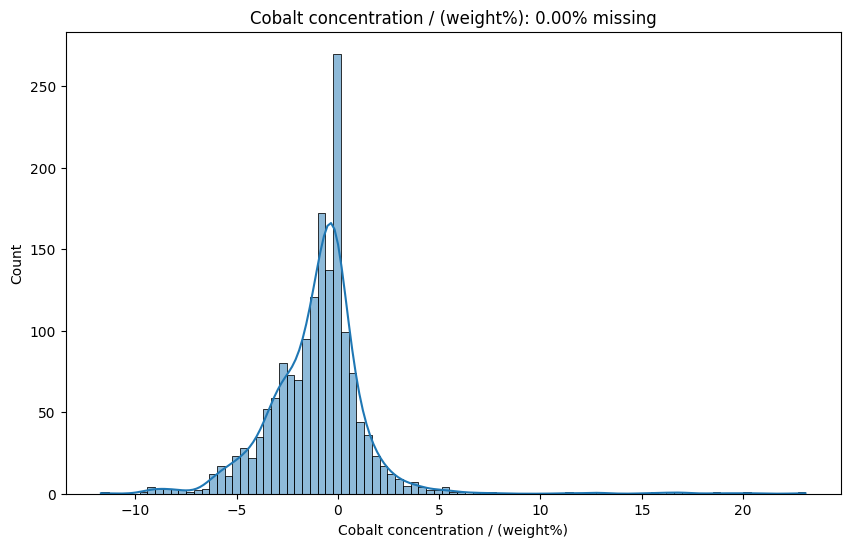

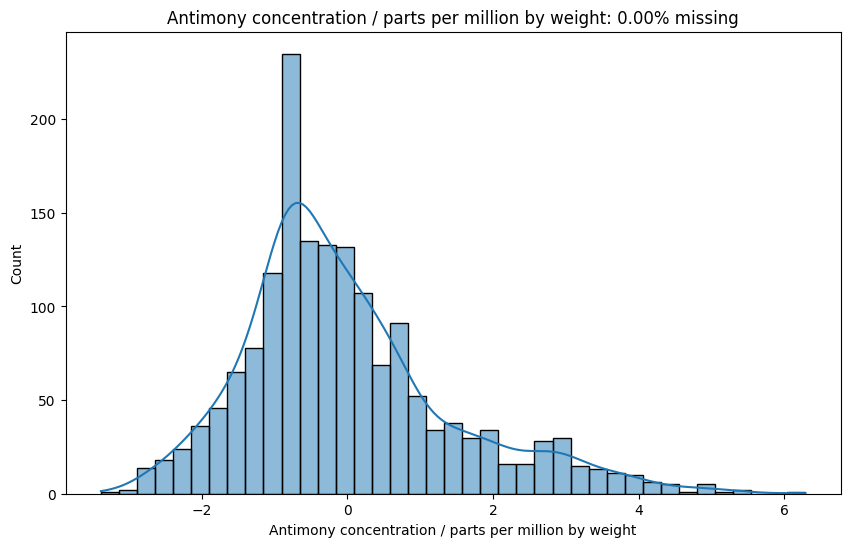

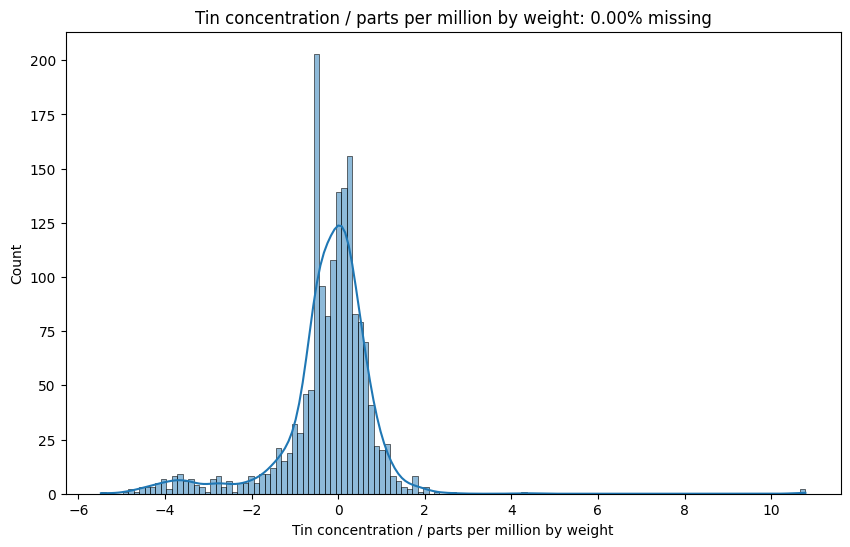

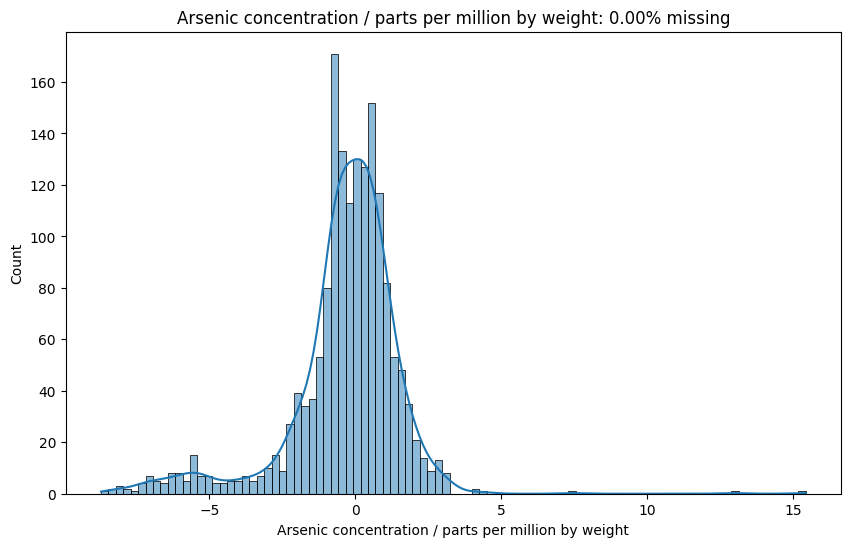

In [10]:
from plots import column_info
column_info('Cobalt concentration / (weight%)', Db)
column_info('Antimony concentration / parts per million by weight', Db)
column_info('Tin concentration / parts per million by weight', Db)
column_info('Arsenic concentration / parts per million by weight', Db)

# Semi supervised learning

In [11]:
from semisupervised import *
from models.evaluation import *

ModuleNotFoundError: No module named 'evaluation'

In [22]:
Db_complete = preprocess_semisupervised(Db, OutputColumn.yield_strength, Models.regressions)

In [10]:
evaluation_semi(Db, OutputColumn.yield_strength, Models.randomforest)

{'MSE': np.float64(1785.826116760136),
 'R²': 0.7618637458235826,
 'Bias': np.float64(0.0970486246582795),
 'Variance': np.float64(4236.713098425663)}